# Team Assignment - Team 02

## Required Installations for this Team Assignment

For this team assignment, we used several external packages. To completely run our notebook and get all the desired outputs, the following packages need to be installed. If you do not have all the desired packages, install them with the following commands:<br/><code>conda install -c conda-forge ipyleaflet<br/>conda install -c conda-forge geopandas<br/>conda install -c conda-forge keplergl<br/>conda install -c conda-forge xgboost<br/>conda install -c conda-forge holidays<br/>conda install -c conda-forge seaborn<br/>conda install -c conda-forge scikit-learn<br/>conda install -c conda-forge pandas<br/>conda install -c conda-forge numpy<br/>conda install -c conda-forge matplotlib</code> </br>

If you are having issues installing the packages you can also try to install them with pip.

In [1]:
# installations using conda-forge
#!conda install -c conda-forge ipyleaflet
#!conda install -c conda-forge geopandas
#!conda install -c conda-forge keplergl
#!conda install -c conda-forge xgboost
#!conda install -c conda-forge holidays
#!conda install -c conda-forge seaborn
#!conda install -c conda-forge scikit-learn
#!conda install -c conda-forge pandas
#!conda install -c conda-forge numpy
#!conda install -c conda-forge matplotlib

# pip installations
#!pip install ipyleaflet
#!pip install geopandas
#!pip install keplergl
#!pip install xgboost
#!pip install holidays
#!pip install seaborn
#!pip install scikit-learn
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

## Imports for Data Preparation

In [2]:
# data analysis
import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# general
import calendar
from datetime import datetime, timedelta
import time
import warnings
from statistics import mean
import holidays

# matplotlib config
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Preparation Bike Rentals

In the following section, we read and prepare our data.

## Methods 

In [3]:
def remove_from_df(df_rows_to_delete, df_target):
    """
    Removes the rows present in df_rows_to_delete in the df_target dataframe.
    It is important to note that both dataframes need to have the same structures and indices.
    ...
    
    Arguments
    ---------
    df_rows_to_delete       : pandas.DataFrame
                            dataframe with same structure as df_target
    df_target               : pandas.DataFrame
                            dataframe where the rows from df_rows_to_delete should be deleted, same structure as df_rows_to_delete
    """
    df_target.drop(df_rows_to_delete.index.values.tolist(), inplace = True)

## Initialize Main Dataframe
As a first step we load our given csv data into a dataframe.

In [4]:
df_initial = pd.read_csv("./data/csv/boston_2018.csv")
df_initial.head()

start_time             end_time  start_station_id  end_station_id  \
0  2018-01-01 00:16:33  2018-01-01 00:23:01               178             107   
1  2018-01-01 00:42:00  2018-01-01 00:46:25                78             225   
2  2018-01-01 00:42:44  2018-01-01 01:02:11                16              76   
3  2018-01-01 00:56:50  2018-01-01 01:11:06                69             177   
4  2018-01-01 01:07:54  2018-01-01 01:16:02                 4              46   

                            start_station_name  \
0              MIT Pacific St at Purrington St   
1                    Union Square - Somerville   
2  Back Bay T Stop - Dartmouth St at Stuart St   
3      Coolidge Corner - Beacon St @ Centre St   
4                  Tremont St at E Berkeley St   

                                    end_station_name  bike_id   user_type  
0                                 Ames St at Main St      643  Subscriber  
1  Cambridge Dept. of Public Works -147 Hampshire...     1581  Subscriber  
2  Central Sq Post Office / Cambridge City Hall a...      173  Subscriber  
3                                    University Park     1772  Subscriber  
4  Christian Science Plaza - Massachusetts Ave at...     1183  Subscriber

Since we need the latitude and longitude coordinate for our map visualization, we took the original uncleaned dataset from https://s3.amazonaws.com/hubway-data/index.html. We use this data to create our own dataframe and check that both dataframes hold the same data.

In [5]:
# reading each month separately
df_original_01 = pd.read_csv('./data/csv/201801_hubway_tripdata.csv')
df_original_02 = pd.read_csv('./data/csv/201802_hubway_tripdata.csv')
df_original_03 = pd.read_csv('./data/csv/201803_hubway_tripdata.csv')
df_original_04 = pd.read_csv('./data/csv/201804-hubway-tripdata.csv')
df_original_05 = pd.read_csv('./data/csv/201805-bluebikes-tripdata.csv')
df_original_06 = pd.read_csv('./data/csv/201806-bluebikes-tripdata.csv')
df_original_07 = pd.read_csv('./data/csv/201807-bluebikes-tripdata.csv')
df_original_08 = pd.read_csv('./data/csv/201808-bluebikes-tripdata.csv')
df_original_09 = pd.read_csv('./data/csv/201809-bluebikes-tripdata.csv')
df_original_10 = pd.read_csv('./data/csv/201810-bluebikes-tripdata.csv')
df_original_11 = pd.read_csv('./data/csv/201811-bluebikes-tripdata.csv')
df_original_12 = pd.read_csv('./data/csv/201812-bluebikes-tripdata.csv')

# create list of all frames
df_original_frames = [
    df_original_01,
    df_original_02,
    df_original_03,
    df_original_04,
    df_original_05,
    df_original_06,
    df_original_07,
    df_original_08,
    df_original_09,
    df_original_10,
    df_original_11,
    df_original_12
]

# concatenate all the frames
df_original = pd.concat(df_original_frames, ignore_index = True) # create main df from original data

# rename columns to match with initial dataset
# rename latitude and longitude columns accordingly
df_original.rename(
    columns =
    {
        "starttime" : "start_time",
        "stoptime" : "end_time",
        "start station id" : "start_station_id",
        "start station name" : "start_station_name",
        "end station id" : "end_station_id",
        "end station name" : "end_station_name",
        "bikeid" : "bike_id",
        "usertype" : "user_type",
        "start station latitude" : "start_station_latitude",
        "start station longitude" : "start_station_longitude",
        "end station latitude": "end_station_latitude",
        "end station longitude": "end_station_longitude",
        "tripduration": "duration"
    }, inplace = True)

# copy original dataframe to compare with initial dataframe
df_original_copy = df_original.copy()
# drop columns in copy to match with initial dataframe df
df_original_copy.drop(['duration', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth year', 'gender'],
                      axis = 1, inplace = True)
# drop same as in copy, but not the latitude and longitude column, since we want to keep them
df_original.drop(['birth year', 'gender'], axis = 1, inplace = True)

Because we want to use the data from the website of BlueBikes instead of the data given by our advisors, we want to make sure that there are no differences between them. Therefore, we will do a quick check to find the different rows. If there are no differences, we are good to go and we can use the original data from the website of BlueBikes.

In [6]:
# check if our original df and our initial df have differences
pd.concat([df_original_copy, df_initial]).drop_duplicates(keep=False)

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type]
Index: []

We see that both dataframes hold the same rows and there are no differences! Therefore, we will use our original dataframe.

In [7]:
# since we want to work with datetime objects, we convert our start and end time to type datetime
# update start and end time to be of type datetime
df_original['start_time'] = pd.to_datetime(df_original['start_time'])
df_original['end_time'] =  pd.to_datetime(df_original['end_time'])
# furthermore, we have a categorical variable named user_type that we can convert
df_original['user_type'] = df_original['user_type'].astype('category')
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767806 entries, 0 to 1767805
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration                 int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         int64         
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int64         
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
dtypes: category(1), datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 163.5+ MB


## Check for Empty Values
Now, we want to check whether we have empty column entries. Therefore, we use the dropna function which drops rows where empty values are found.

In [8]:
# if there are empty values the length would be > 0
if (len(df_original) - len(df_original.dropna(how = 'any')) == 0):
    print('There are no empty values in the dataframe df_original.')
else:
    print('There are empty values in the dataframe df_original.')

There are no empty values in the dataframe df_original.


At this moment, we know that there are no empty or null values.

## Checking the Validity of Values

### Id's <= 0
To assess if the values in the columns start_station_id, end_station_id and bike_id are valid, we could check if there are values less than or equal to 0.

In [9]:
# check for negative values
if ((df_original['start_station_id'].values <= 0).any() or (df_original['end_station_id'].values <= 0).any() or (df_original['bike_id'].values <= 0).any()):
    print('Invalid column values existing.')
else:
    print('All columns are valid.')

All columns are valid.


### Unknown User Types

We should also assess if there was data falsely captured in the user_type column. Therefore, we check the unique values of the column. If there are only a few values and they appear to be different, we can assume that these values are valid.

In [10]:
df_original['user_type'].unique()

['Subscriber', 'Customer']
Categories (2, object): ['Customer', 'Subscriber']

Since there are only two unique values we assume that they are valid.

### Duplicate Rows
We also want to check for duplicate rows. Duplicate entries should be assessed by the start_time, end_time, start_station_id, end_station_id and bike_id. These attributes should identify duplicates.

In [11]:
# check duplicate rows
df_original[df_original.duplicated(['start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id'])]

Empty DataFrame
Columns: [duration, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type]
Index: []

We see that there are no duplicate rows! Therefore, we do not need to eliminate any rows.

### Rentals Crossing the Daylight Saving Time and Rentals Where Start Time > End Time

In [12]:
# get all items where start_time > end_time
df_end_before_start = df_original[df_original['start_time'] >= df_original['end_time']]
df_end_before_start

duration              start_time                end_time  \
1581143       470 2018-11-04 01:58:22.202 2018-11-04 01:06:12.296   

         start_station_id        start_station_name  start_station_latitude  \
1581143               342  Boylston St at Jersey St               42.344651   

         start_station_longitude  end_station_id       end_station_name  \
1581143               -71.097325              19  Park Dr at Buswell St   

         end_station_latitude  end_station_longitude  bike_id   user_type  
1581143             42.347241             -71.105301     4110  Subscriber

We found one entry. Since this is only one entry, we remove it.

In [13]:
# remove from original df
remove_from_df(df_end_before_start, df_original)

Next, we want to find values where the bike rentals cross the daylight saving time. We assume that these rows are invalid, because they do not represent the real duration. We looked it up on the internet and found that the time change appeared on 11.03.2018 from 2am to 3am.

In [14]:
# time change on 11.03.2018 from 2am to 3am
mask_winter_to_summer_time = (df_original['start_time'] < pd.to_datetime('2018-03-11 02:00:00.000')) & (df_original['end_time'] > pd.to_datetime('2018-03-11 02:00:00.000'))
# all these entries have one hour more (but should be ok)
df_winter_to_summer_time = df_original.loc[mask_winter_to_summer_time]
df_winter_to_summer_time

duration          start_time            end_time  start_station_id  \
63713    2317626 2018-02-13 17:55:44 2018-03-12 14:42:50                29   
91481    2158988 2018-02-24 15:55:40 2018-03-21 16:38:48                58   
115293    513851 2018-03-06 17:03:39 2018-03-12 16:47:50                93   
122311       525 2018-03-11 01:55:15 2018-03-11 03:04:00                36   
122312       556 2018-03-11 01:55:17 2018-03-11 03:04:33                36   

                                    start_station_name  \
63713   Innovation Lab - 125 Western Ave at Batten Way   
91481                        Beacon St at Arlington St   
115293                                JFK/UMass T Stop   
122311     Copley Square - Dartmouth St at Boylston St   
122312     Copley Square - Dartmouth St at Boylston St   

        start_station_latitude  start_station_longitude  end_station_id  \
63713                42.363732               -71.124565              41   
91481                42.355549               -71.072842              47   
115293               42.320340               -71.051180              93   
122311               42.349767               -71.077327              33   
122312               42.349767               -71.077327              33   

                                         end_station_name  \
63713   Packard's Corner - Commonwealth Ave at Brighto...   
91481                              Cross St at Hanover St   
115293                                   JFK/UMass T Stop   
122311                                     Kenmore Square   
122312                                     Kenmore Square   

        end_station_latitude  end_station_longitude  bike_id   user_type  
63713              42.352261             -71.123831      872  Subscriber  
91481              42.362811             -71.056067      804    Customer  
115293             42.320340             -71.051180       36    Customer  
122311             42.348706             -71.097009      470  Subscriber  
122312             42.348706             -71.097009     1567  Subscriber

In [15]:
# remove from original df
remove_from_df(df_winter_to_summer_time, df_original)

### Bike Rentals Longer Than Three Hours

From looking at the data we found out that some bike rentals appeared to be more than 24 or even 48 hours. Since later we want to predict the demand, we do not really care about these long rentals. Therefore, we want to delete all rentals longer than three hours.

In [16]:
df_long_rent = df_original[df_original['duration'] / 60 > 3*60]
print('Number of rentals that are longer than three hours: ', len(df_long_rent))
print('Proportion: ', len(df_long_rent)/len(df_original), '%')
df_long_rent.head(2)

Number of rentals that are longer than three hours:  7615
Proportion:  0.004307613983482295 %


duration          start_time            end_time  start_station_id  \
894      32078 2018-01-02 21:34:13 2018-01-03 06:28:52                76   
1396     15115 2018-01-03 12:01:07 2018-01-03 16:13:03                 6   

                                     start_station_name  \
894   Central Sq Post Office / Cambridge City Hall a...   
1396                             Cambridge St at Joy St   

      start_station_latitude  start_station_longitude  end_station_id  \
894                42.366426               -71.105495              68   
1396               42.361199               -71.065195               6   

                           end_station_name  end_station_latitude  \
894   Central Square at Mass Ave / Essex St             42.365070   
1396                 Cambridge St at Joy St             42.361199   

      end_station_longitude  bike_id   user_type  
894              -71.103100     1915  Subscriber  
1396             -71.065195     1578  Subscriber

We have 7615 entries with a duration longer than three hours. Since this is less than 5% of our data we drop these entries.

In [17]:
# remove them from our df
remove_from_df(df_long_rent, df_original)

### Bike Rentals Shorter than One Minute

Since we deleted long rentals, we should also remove very short rentals. Therefore, we have looked at a duration shorter then one minute, but didn't find any trip matching this short durations.

In [18]:
df_short_rentals = df_original[df_original['duration'] / 60 <=1]
print('Number of rentals shorter than one minute: ', len(df_short_rentals))
df_short_rentals.head(5)

Number of rentals shorter than one minute:  0


Empty DataFrame
Columns: [duration, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type]
Index: []

## Relationship Between Station ID and Station Name
We want to assess the relationship between the station id and the station name. To do so, we first get all the unique station ids. Then we iterate over them and find all the station names that are different. If there is more than one station name associated with a station id, we know that an id does not automatically identify a station name uniquely. Reasons for this could be that different stations, that are very close to each other, are described by the same id or multiple names were used for a single station.

In [19]:
unique_start_station_ids = df_original['start_station_id'].unique()
ambiguous_stations = []

# iterate over all the unique station names and check if there is more than one unique value associated with an id
for id in unique_start_station_ids:
    # get the station names where multiple names exist
    if (df_original[df_original['start_station_id'] == id]['start_station_name'].nunique() > 1):
        ambiguous_station = df_original[df_original['start_station_id'] == id]['start_station_name'].unique()
        ambiguous_stations.append(ambiguous_station)

# print first few ambiguous stations
for i in range(10):
    print('Ambiguous station', '(',str(i + 1),'): ', ambiguous_stations[i])

Ambiguous station ( 1 ):  ['Coolidge Corner - Beacon St @ Centre St'
 'Coolidge Corner - Beacon St at Centre St']
Ambiguous station ( 2 ):  ["Upham's Corner TEMPORARY WINTER LOCATION" "Upham's Corner"]
Ambiguous station ( 3 ):  ['Boylston St at Arlington St TEMPORARY WINTER LOCATION'
 'Boylston St at Arlington St']
Ambiguous station ( 4 ):  ['Charles Circle - Charles St at Cambridge St TEMPORARY WINTER LOCATION'
 'Charles Circle - Charles St at Cambridge St']
Ambiguous station ( 5 ):  ['Boylston St at Washington St' 'Chinatown T Stop']
Ambiguous station ( 6 ):  ['Brian P. Murphy Staircase at Child Street' 'Child St at North St']
Ambiguous station ( 7 ):  ['Brookline Village - Station Street @ MBTA TEMPORARY WINTER LOCATION'
 'Brookline Village - Station Street @ MBTA' 'Brookline Town Hall']
Ambiguous station ( 8 ):  ['Beacon St at Arlington St' 'Mugar Way at Beacon St']
Ambiguous station ( 9 ):  ['Commonwealth Ave at Buick St' 'Commonwealth Ave at Agganis Way']
Ambiguous station ( 10 )

Above, we can see all the stations that have more than one name associated with an id. For our data analysis this is okay, since we use the id instead of the name. For further analysis we could use the current bike stations to get an idea of what this station is named today. Therefore, we do not delete any stations or rental entries.

### Invalid Station Coordinates

Since we have checked our dataframe for null values we do not need to do this for our coordinate columns. But we can check if there are any coordinates being = 0.

In [20]:
# mask to find either latitude or longitude values zero
coordinate_empty_mask = (df_original['start_station_longitude'] == 0) | (df_original['start_station_latitude'] == 0) | (df_original['end_station_longitude'] == 0) | (df_original['end_station_latitude'] == 0)
# get columns where mask-statement is true
df_zero_values = df_original[coordinate_empty_mask]
# print to console
df_zero_values.head(5)

duration              start_time                end_time  \
68887         184 2018-02-15 14:06:12.000 2018-02-15 14:09:16.000   
780235        231 2018-07-18 15:07:22.585 2018-07-18 15:11:13.793   
780307        378 2018-07-18 15:17:17.646 2018-07-18 15:23:36.393   
1529250       124 2018-10-25 11:01:43.611 2018-10-25 11:03:47.728   
1637923        66 2018-11-15 15:59:08.196 2018-11-15 16:00:14.703   

         start_station_id                                start_station_name  \
68887                  91  One Kendall Square at Hampshire St / Portland St   
780235                158                                         8D OPS 01   
780307                158                                         8D OPS 01   
1529250               229                                  8D QC Station 01   
1637923               229                                  8D QC Station 01   

         start_station_latitude  start_station_longitude  end_station_id  \
68887                 42.366277               -71.091690             164   
780235                 0.000000                 0.000000             158   
780307                 0.000000                 0.000000             158   
1529250               42.345033               -71.096649             230   
1637923               42.345033               -71.096649             230   

         end_station_name  end_station_latitude  end_station_longitude  \
68887            Lab PBSC                   0.0                    0.0   
780235          8D OPS 01                   0.0                    0.0   
780307          8D OPS 01                   0.0                    0.0   
1529250  8D QC Station 02                   0.0                    0.0   
1637923  8D QC Station 02                   0.0                    0.0   

         bike_id   user_type  
68887       1743  Subscriber  
780235      1583    Customer  
780307      1583  Subscriber  
1529250     1583    Customer  
1637923     1583    Customer

Since we want to visualize stations on the map and falsely captured coordinates could lead to bad visualizations, we want to delete them.

In [21]:
# remove values
remove_from_df(df_zero_values, df_original)

In [22]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760180 entries, 0 to 1767805
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration                 int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         int64         
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int64         
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
dtypes: category(1), datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 176.3+ MB


## Updating Index

By now, we are finished with our data cleaning. Since we have deleted some rows, we want to reset the index to remove the missing spaces between indices.

In [23]:
df_original.reset_index(drop = True, inplace = True)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760180 entries, 0 to 1760179
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration                 int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         int64         
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int64         
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
dtypes: category(1), datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 162.8+ MB


# Data Preparation Weather 

## Initialize Main Dataframe

 At first we need to create our dataframe from our csv-file. Then we check for general information on the data.

In [24]:
df_weather = pd.read_csv("./data/csv/weather_hourly_boston.csv")
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [25]:
df_weather.head(5)

date_time  max_temp  min_temp  precip
0  2015-01-02 01:00:00      -1.1      -1.1     0.0
1  2015-01-02 02:00:00      -1.1      -1.1     0.0
2  2015-01-02 03:00:00      -0.6      -0.6     0.0
3  2015-01-02 04:00:00      -0.6      -0.6     0.0
4  2015-01-02 05:00:00      -0.6      -0.6     0.0

We can see that we got 43848 entries in our dataframe, from which 43354 are non-null values for date_time, max_temp and min_temp and 43356 non-null values for precip. Furthermore, our dataframe holds more data than just weather data from 2018. Therefore, we cast the datetime column to a datetime object and remove all rows where the year is not 2018. In addition to that, we remove all the null values. 

In [26]:
# date_time to datetime object format
df_weather['date_time'] = pd.to_datetime(df_weather['date_time'])
# remove all rows where year is not 2018
df_weather_2018 = df_weather[df_weather['date_time'].dt.year == 2018].copy()
# check date_time is converted to datetime object and dataframe corresponds to the year 2018
df_weather_2018.info()
df_weather_2018.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8635 entries, 26280 to 35062
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8635 non-null   datetime64[ns]
 1   max_temp   8635 non-null   float64       
 2   min_temp   8635 non-null   float64       
 3   precip     8635 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 337.3 KB


date_time  max_temp  min_temp  precip
26280 2018-01-01 01:00:00     -13.3     -13.3     0.0
26281 2018-01-01 02:00:00     -13.9     -13.9     0.0
26282 2018-01-01 03:00:00     -14.4     -14.4     0.0
26283 2018-01-01 04:00:00     -15.0     -15.0     0.0
26284 2018-01-01 05:00:00     -15.6     -15.6     0.0
26303 2018-01-01 00:00:00     -12.8     -12.8     0.0
26304 2018-01-02 01:00:00     -13.3     -13.3     0.0
26305 2018-01-02 02:00:00     -13.9     -13.9     0.0
26306 2018-01-02 03:00:00     -13.9     -13.9     0.0
26307 2018-01-02 04:00:00     -13.9     -13.9     0.0

Now, we only have a dataframe that corresponds to the year 2018. Furthermore, from the first 10 entries, we can see that the timestamps in the date_time column are not properly sorted. So, our next step is to sort them.

In [27]:
# sorting the dataframe by date_time
df_weather_2018.sort_values(by = 'date_time', inplace = True)
df_weather_2018.head(10)

date_time  max_temp  min_temp  precip
26303 2018-01-01 00:00:00     -12.8     -12.8     0.0
26280 2018-01-01 01:00:00     -13.3     -13.3     0.0
26281 2018-01-01 02:00:00     -13.9     -13.9     0.0
26282 2018-01-01 03:00:00     -14.4     -14.4     0.0
26283 2018-01-01 04:00:00     -15.0     -15.0     0.0
26284 2018-01-01 05:00:00     -15.6     -15.6     0.0
26309 2018-01-01 06:00:00     -16.7     -16.7     0.0
26310 2018-01-01 07:00:00     -17.2     -17.2     0.0
26311 2018-01-01 08:00:00     -17.2     -17.2     0.0
26312 2018-01-01 09:00:00     -17.2     -17.2     0.0

The timestamps in the date_time column are now sorted.

## Check for Empty Values

In [28]:
# if there are empty values the length would be > 0
len(df_weather_2018) - len(df_weather_2018.dropna(how = 'any'))

0

Since the result is 0, we know that there are no empty values in any column.

## Checking the Validity of Values

### Duplicate Columns

From a first view on the data we can see that multiple entries of the columns min_temp and max_temp seem to be identical. If that would be the case for all the entries, we could drop one of these columns. Therefore, we check if the column entries per row in the columns min_temp and max_temp are equivalent:

In [29]:
# check if all entries of column max_temp are identical with column min_temp
df_weather_2018['max_temp'].equals(df_weather_2018['min_temp'])

False

Since the column entries are not the same, we keep both columns.

### Duplicate Rows

In order to gain knowledge if there are values which are redundant in our dataset, we perform a check for duplicate rows and display them. 

In [30]:
weather_duplicates = df_weather_2018[df_weather_2018.duplicated()]
weather_duplicates.head(5)

date_time  max_temp  min_temp  precip
26399 2018-01-04 23:00:00      -2.8      -3.3     0.0
26376 2018-01-05 01:00:00      -3.3      -3.3     0.0
26646 2018-01-15 07:00:00      -8.9      -8.9     0.0
26672 2018-01-16 08:00:00      -6.1      -6.1     0.0
26676 2018-01-16 12:00:00      -5.6      -5.6     0.0

In [31]:
weather_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 26399 to 34837
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  149 non-null    datetime64[ns]
 1   max_temp   149 non-null    float64       
 2   min_temp   149 non-null    float64       
 3   precip     149 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.8 KB


 Indeed, there are 149 rows that are redundant in the dataframe. In our next step we drop all these completely duplicated values:

In [32]:
df_weather_2018.drop_duplicates(inplace = True)
df_weather_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8486 entries, 26303 to 35062
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8486 non-null   datetime64[ns]
 1   max_temp   8486 non-null   float64       
 2   min_temp   8486 non-null   float64       
 3   precip     8486 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 331.5 KB


In [33]:
df_weather_2018.head(83)

date_time  max_temp  min_temp  precip
26303 2018-01-01 00:00:00     -12.8     -12.8     0.0
26280 2018-01-01 01:00:00     -13.3     -13.3     0.0
26281 2018-01-01 02:00:00     -13.9     -13.9     0.0
26282 2018-01-01 03:00:00     -14.4     -14.4     0.0
26283 2018-01-01 04:00:00     -15.0     -15.0     0.0
...                   ...       ...       ...     ...
26381 2018-01-04 06:00:00      -5.0      -5.0     0.0
26382 2018-01-04 07:00:00      -5.0      -5.0     0.0
26383 2018-01-04 07:00:00      -4.4      -4.4     0.0
26384 2018-01-04 09:00:00      -3.9      -3.9     0.0
26385 2018-01-04 10:00:00      -4.4      -4.4     0.0

[83 rows x 4 columns]

By now, we have a dataframe containing only values from 2018, without null entries or completely duplicates. We also know that some entries are missing, because we have 8486, but need 365*24 = 8760. An example can be seen for the 01.04.2018, where the entry for 8:00am is missing.


### Duplicate or Missing Timestamp

Furthermore, since we only checked whether there are completely duplicated entries (rows) in the previous step, our next step is to identify whether there are also entries with the same timestamp (i.e. whether there are duplicate entries in the datetime column).

In [34]:
# In order to print both rows of the duplicate timestamps to see the differing values for the temperature or
# the precip, now we set keep=false as attribute for the duplicated() function.
weather_duplicate_timestamps = df_weather_2018[df_weather_2018.duplicated(subset = ['date_time'], keep = False)].copy()
weather_duplicate_timestamps.head(6)

date_time  max_temp  min_temp  precip
26382 2018-01-04 07:00:00      -5.0      -5.0     0.0
26383 2018-01-04 07:00:00      -4.4      -4.4     0.0
26385 2018-01-04 10:00:00      -4.4      -4.4     0.0
26386 2018-01-04 10:00:00      -3.3      -3.3     0.0
26417 2018-01-05 18:00:00     -10.0     -10.0     0.0
26418 2018-01-05 18:00:00     -10.0     -10.6     0.0

We see that we have a lot of duplicate entries in the datetime column. First, we want to close the gaps of the missing entries. Afterwards, we will cover the duplicates and remove them. In order to be able to add new entries more easily, we transpose our dataframe, but retranspose it afterwards to keep the original shape of the dataframe.

In [35]:
# make copy
interpolation = df_weather_2018.copy()

# Adding a column named interpolated to control which columns are interpolated or not.
# Default value is False for not interpolated and it will be changed to True when the column is new and interpolated 
interpolation["interpolated"] = list(map(lambda x: 'False', interpolation["max_temp"]))


# Transpositon of the dataframe in order to add colums to the dataframe instead of adding rows 
interpolation_T = interpolation.T

interpolation_T.head()

26303                26280                26281  \
date_time     2018-01-01 00:00:00  2018-01-01 01:00:00  2018-01-01 02:00:00   
max_temp                    -12.8                -13.3                -13.9   
min_temp                    -12.8                -13.3                -13.9   
precip                        0.0                  0.0                  0.0   
interpolated                False                False                False   

                            26282                26283                26284  \
date_time     2018-01-01 03:00:00  2018-01-01 04:00:00  2018-01-01 05:00:00   
max_temp                    -14.4                -15.0                -15.6   
min_temp                    -14.4                -15.0                -15.6   
precip                        0.0                  0.0                  0.0   
interpolated                False                False                False   

                            26309                26310                26311  \
date_time     2018-01-01 06:00:00  2018-01-01 07:00:00  2018-01-01 08:00:00   
max_temp                    -16.7                -17.2                -17.2   
min_temp                    -16.7                -17.2                -17.2   
precip                        0.0                  0.0                  0.0   
interpolated                False                False                False   

                            26312  ...                35053  \
date_time     2018-01-01 09:00:00  ...  2018-12-31 14:00:00   
max_temp                    -17.2  ...                  2.8   
min_temp                    -17.2  ...                  2.8   
precip                        0.0  ...                  0.0   
interpolated                False  ...                False   

                            35054                35055                35056  \
date_time     2018-12-31 15:00:00  2018-12-31 16:00:00  2018-12-31 17:00:00   
max_temp                      4.4                  5.6                  6.7   
min_temp                      4.4                  5.6                  6.7   
precip                        0.0                  0.0                  0.0   
interpolated                False                False                False   

                            35057                35058                35059  \
date_time     2018-12-31 18:00:00  2018-12-31 19:00:00  2018-12-31 20:00:00   
max_temp                      6.7                  6.7                  6.7   
min_temp                      6.7                  6.7                  6.7   
precip                        0.0                  0.0                  0.0   
interpolated                False                False                False   

                            35060                35061                35062  
date_time     2018-12-31 21:00:00  2018-12-31 22:00:00  2018-12-31 23:00:00  
max_temp                      6.1                  5.6                  5.6  
min_temp                      6.1                  5.6                  5.6  
precip                        0.0                  0.0                  0.0  
interpolated                False                False                False  

[5 rows x 8486 columns]

In the following, we iterate over the datetime entries and identify if an entry is missing. In this case, we insert the missing entry.

In [36]:
# For loop to go over all columns of the transposed dataframe
for i in range(0,len(df_weather_2018) - 2): # "-2" to avoid overflow
    
    # Store the current date on position i from the for loop.
    # Then calculate which schould be the following date entry (current date plus 1 hour)
    first_datetime = df_weather_2018.iloc[i].date_time 
    following_datetime = first_datetime + timedelta(hours=1)
    
    # Check whether the date entry at position i+1 is not equal to 
    # the previously calculated and thus expected date value. If this is the case, we have a missing value.
    if following_datetime != df_weather_2018.iloc[i+1].date_time: 
        
        # Determination of the number of missing entries through
        # Calculation of difference between following entry and the previous(first) datetime
        difference = df_weather_2018.iloc[i+1].date_time - first_datetime
        number_missing_rows = ((difference.seconds / 60) / 60)
        number_missing_rows = int(number_missing_rows) - 1
                
        # Using previously calculated number of missing rows to insert the missing date and time.
        # Further, all other values are filled with np.nan to be interpolated later on.
        # The value for the attribute "interpolated" is set to True, as this is now a new entry.
        # The new entry will be inserted as a column located on the index -1.
        # Therefore, we must allow duplication in the indices.
        # This is done to prevent the loop from continuing and running over the new entries as well.
        for x in range(1, number_missing_rows + 1):
            new_datetime = first_datetime + timedelta(hours = x)
            interpolation_T.insert(0, -1, [new_datetime,np.nan,np.nan,np.nan, 'True'], True)
            
interpolation_T.head()

-1                   -1                   -1      \
date_time     2018-12-29 14:00:00  2018-12-29 04:00:00  2018-12-29 01:00:00   
max_temp                      NaN                  NaN                  NaN   
min_temp                      NaN                  NaN                  NaN   
precip                        NaN                  NaN                  NaN   
interpolated                 True                 True                 True   

                           -1                   -1                   -1      \
date_time     2018-12-28 22:00:00  2018-12-28 15:00:00  2018-12-27 10:00:00   
max_temp                      NaN                  NaN                  NaN   
min_temp                      NaN                  NaN                  NaN   
precip                        NaN                  NaN                  NaN   
interpolated                 True                 True                 True   

                           -1                   -1                   -1      \
date_time     2018-12-26 17:00:00  2018-12-24 22:00:00  2018-12-22 17:00:00   
max_temp                      NaN                  NaN                  NaN   
min_temp                      NaN                  NaN                  NaN   
precip                        NaN                  NaN                  NaN   
interpolated                 True                 True                 True   

                           -1      ...                35053  \
date_time     2018-12-22 14:00:00  ...  2018-12-31 14:00:00   
max_temp                      NaN  ...                  2.8   
min_temp                      NaN  ...                  2.8   
precip                        NaN  ...                  0.0   
interpolated                 True  ...                False   

                            35054                35055                35056  \
date_time     2018-12-31 15:00:00  2018-12-31 16:00:00  2018-12-31 17:00:00   
max_temp                      4.4                  5.6                  6.7   
min_temp                      4.4                  5.6                  6.7   
precip                        0.0                  0.0                  0.0   
interpolated                False                False                False   

                            35057                35058                35059  \
date_time     2018-12-31 18:00:00  2018-12-31 19:00:00  2018-12-31 20:00:00   
max_temp                      6.7                  6.7                  6.7   
min_temp                      6.7                  6.7                  6.7   
precip                        0.0                  0.0                  0.0   
interpolated                False                False                False   

                            35060                35061                35062  
date_time     2018-12-31 21:00:00  2018-12-31 22:00:00  2018-12-31 23:00:00  
max_temp                      6.1                  5.6                  5.6  
min_temp                      6.1                  5.6                  5.6  
precip                        0.0                  0.0                  0.0  
interpolated                False                False                False  

[5 rows x 9175 columns]

Next, we retranspose the dataframe and sort the new entries in the right order.

In [37]:
# Retranspose the dataframe for the initial dataframe structure
interpolation = interpolation_T.T

# Sort the dataframe again with regard to datetime for putting the new entries in the right order
interpolation = interpolation.sort_values(by = 'date_time')

# Reset the index, in order to remove the "-1" indices
interpolation.reset_index(drop = True, inplace = True)

At last, we fill the other missing values for the new entries. Therefore, we linearly interpolate the temperatures and forward fill the precip (because precip can be 1 or 0, since 0.5 does not make sense).

In [38]:
# Since filling new entries with NaN, the datatype of the columns changed to object. Therefore we change it
# back to the numeric datatype float. With using errors='coerce' every value that cannot be converted to float
# will be a numeric NaN value.
interpolation['max_temp'] = pd.to_numeric(interpolation['max_temp'], errors = 'coerce')
interpolation['min_temp'] = pd.to_numeric(interpolation['min_temp'], errors = 'coerce')
interpolation['precip'] = pd.to_numeric(interpolation['precip'], errors = 'coerce')

# Now we are ready to interpolate the NaN values:
interpolation['max_temp'] = interpolation['max_temp'].interpolate()
interpolation['min_temp'] = interpolation['min_temp'].interpolate()
interpolation['precip'] = interpolation['precip'].fillna(method = 'ffill')

# Check the example of 01.04.2018 8:00
interpolation.head(83)

date_time  max_temp  min_temp  precip interpolated
0  2018-01-01 00:00:00    -12.80    -12.80     0.0        False
1  2018-01-01 01:00:00    -13.30    -13.30     0.0        False
2  2018-01-01 02:00:00    -13.90    -13.90     0.0        False
3  2018-01-01 03:00:00    -14.40    -14.40     0.0        False
4  2018-01-01 04:00:00    -15.00    -15.00     0.0        False
..                 ...       ...       ...     ...          ...
78 2018-01-04 06:00:00     -5.00     -5.00     0.0        False
79 2018-01-04 07:00:00     -4.40     -4.40     0.0        False
80 2018-01-04 07:00:00     -5.00     -5.00     0.0        False
81 2018-01-04 08:00:00     -4.45     -4.45     0.0         True
82 2018-01-04 09:00:00     -3.90     -3.90     0.0        False

[83 rows x 5 columns]

We filled the missing entries and our dataframe is almost ready. Now the only thing that is still incorrect are the duplicates. When we looked at the data we found several occurrences where the data looked like the following:  <br/> 
![alt text](./images/Weather_Issue.png "Issue with Weather Data") <br/>
We thought about this formation of data and we took an assumption. Since the values of the duplicates with the index 34970 and 34971 are different and the following hour is missing, we made the assumption that one of the values with the index 34970 or 34971 is the real value for the missing hour (e.g. because of an error in measurement where the measurement has been activated shortly before the full hour and hence counts for the hour before). Therefore, we search for these cases and set the value of the missing hour to one of the duplicate values, where the tendency of temperatures is suitable.

In [39]:
interpolation_copy = interpolation.copy()

# we store our indices that we want to drop after we finished
# we are not dropping immediately, because then our indices in our loop would be wrong
indices_to_drop = []

# iterate over all the interpolation rows
for index, item in interpolation.iterrows():
    # check for index out of bound exception
    # check if the value was interpolated
    if (item['interpolated'] == 'True') and (index >= 3) and (index < len(interpolation) - 1):
        # check if previous has duplicate values
        if interpolation.iloc[index - 1]['date_time'] == interpolation.iloc[index - 2]['date_time']:
            # get minimum temperature from hour previous to our duplicates
            # could also chose max, but we chose min
            before_min = interpolation.iloc[index - 3]['min_temp']
            after_min = interpolation.iloc[index + 1]['min_temp']
            
            # calculate average temperature between min and max for first and second duplicate
            # we use this later to decide whether we take the higher or lower value
            # we take the higher value if the temperature tendency is rising
            # we take the lower value if the temperature tendency is falling
            avg_1 = mean([interpolation.iloc[index - 1]['min_temp'], interpolation.iloc[index - 1]['max_temp']])
            avg_2 = mean([interpolation.iloc[index - 2]['min_temp'], interpolation.iloc[index - 2]['max_temp']])
            
            # find degree tendency to assess if we want to take the warmer or the colder value
            if before_min < after_min: # getting warmer
                if avg_1 > avg_2: # take values calculated from avg_1 and delete row avg_2
                    # set min and max
                    interpolation_copy.at[index, 'min_temp'] = interpolation_copy.iloc[index - 1]['min_temp']
                    interpolation_copy.at[index, 'max_temp'] = interpolation_copy.iloc[index - 1]['max_temp']
                    interpolation_copy.at[index, 'precip'] = interpolation_copy.iloc[index - 1]['precip']
                    # delete row that we used for row that was once interpolated
                    indices_to_drop.append(index - 1)
                else: # take values calculated from avg_2 and delete row avg_1
                    # set min and max
                    interpolation_copy.at[index, 'min_temp'] = interpolation_copy.iloc[index - 2]['min_temp']
                    interpolation_copy.at[index, 'max_temp'] = interpolation_copy.iloc[index - 2]['max_temp']
                    interpolation_copy.at[index, 'precip'] = interpolation_copy.iloc[index - 2]['precip']
                    # delete row that we used for row that was once interpolated
                    indices_to_drop.append(index - 2)
            else: # getting colder
                if avg_1 < avg_2: # take values calculated from avg_1 and delete row avg_2
                     # set min and max
                    interpolation_copy.at[index, 'min_temp'] = interpolation_copy.iloc[index - 1]['min_temp']
                    interpolation_copy.at[index, 'max_temp'] = interpolation_copy.iloc[index - 1]['max_temp']
                    interpolation_copy.at[index, 'precip'] = interpolation_copy.iloc[index - 1]['precip']
                    # delete row that we used for row that was once interpolated
                    indices_to_drop.append(index - 1)
                else: # take values calculated from avg_2 and delete row avg_1
                    # set min and max
                    interpolation_copy.at[index, 'min_temp'] = interpolation_copy.iloc[index - 2]['min_temp']
                    interpolation_copy.at[index, 'max_temp'] = interpolation_copy.iloc[index - 2]['max_temp']
                    interpolation_copy.at[index, 'precip'] = interpolation_copy.iloc[index - 2]['precip']
                    indices_to_drop.append(index - 2)

# after iterating, finally drop all the stored indices
interpolation_copy.drop(interpolation_copy.index[[indices_to_drop]], inplace = True)

To assure that after the operation above we don't have anymore duplicates, we dropped them in the following. Afterwards there should be the right number of entries (=365*24) in our dataframe.

In [40]:
# Since we could still have duplicates we need to drop them as well
interpolation_copy.drop_duplicates(subset = ['date_time'], inplace = True)

# and we drop the interpolated column, because this was only a temporal column that we dont need anymore
interpolation_copy.drop('interpolated', axis = 1, inplace = True)

In [41]:
# Check if we have the correct number of rows
if 365*24 == len(interpolation_copy):
    print('Number of entries equals the number of hours in 2018!')
else:
    print('The number of entries are not equal to the number of hours in 2018. Resulting in an issue!')
    
# Reset the index, because of dropping duplicates before:
interpolation_copy.reset_index(drop=True, inplace = True)

# Check our example of 01.04.2018 8:00
interpolation_copy.head(83)

Number of entries equals the number of hours in 2018!


date_time  max_temp  min_temp  precip
0  2018-01-01 00:00:00     -12.8     -12.8     0.0
1  2018-01-01 01:00:00     -13.3     -13.3     0.0
2  2018-01-01 02:00:00     -13.9     -13.9     0.0
3  2018-01-01 03:00:00     -14.4     -14.4     0.0
4  2018-01-01 04:00:00     -15.0     -15.0     0.0
..                 ...       ...       ...     ...
78 2018-01-04 06:00:00      -5.0      -5.0     0.0
79 2018-01-04 07:00:00      -5.0      -5.0     0.0
80 2018-01-04 08:00:00      -4.4      -4.4     0.0
81 2018-01-04 09:00:00      -3.9      -3.9     0.0
82 2018-01-04 10:00:00      -3.3      -3.3     0.0

[83 rows x 4 columns]

In [42]:
interpolation_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8760 non-null   datetime64[ns]
 1   max_temp   8760 non-null   float64       
 2   min_temp   8760 non-null   float64       
 3   precip     8760 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 273.9 KB


Indeed, our dataset now contains the right number of entries. Now we are finished with the weather data. Our dataset is cleaned and missing values were either interpolated or taken from a duplicate entry, according to our assumption.

# Data Preparation for Visualization and Analytics

In this part we take the cleaned weather and bike rental data and create a new dataframe. This dataframe is mainly used for for our descriptive analytics, but we will slightly change it later and also use it for our predictive analytics. It will hold both the weather data as well as our bike rental data.

## Methods

In [43]:
def set_datatype(datatype, columns, df):
    """
    Sets the datatype of given column in given dataframe.
    ...
    
    Arguments
    ---------
    datatype                : string
                            datatype that the columns should get (only valid ones are allowed)
    columns                 : list
                            list of column names that should receive the new datatype
    df                      : pandas.DataFrame
                            dataframe, where the columns should get updated
    """
    for column in columns:
        df[column] = df[column].astype(datatype)

## Add Date, Hour, Weekday, Month and Season

We add a few more columns that are directly extracted from our date_time column. These columns are named date, hour, weekday, month and season. These columns help us in our descriptive analytics to visualize the demand for bike rentals at specific time periods (e.g. during day, during a week, during a month).

In [44]:
# we cast both the date_time and start_time column to string to use the apply function
interpolation_copy["date_time"] = interpolation_copy["date_time"].astype(str)
df_original['start_time'] = df_original['start_time'].astype(str)
seasons = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}

# adding four columns for visualization
# we use the apply function to each row in the dataframe
interpolation_copy["date"] = interpolation_copy.date_time.apply(lambda x : x.split()[0])
interpolation_copy["hour"] = interpolation_copy.date_time.apply(lambda x : x.split()[1].split(":")[0])
interpolation_copy["weekday"] = interpolation_copy.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
interpolation_copy["month"] = interpolation_copy.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, "%Y-%m-%d").month])
interpolation_copy["season"] = interpolation_copy.date.apply(lambda dateString : seasons[(datetime.strptime(dateString, "%Y-%m-%d").month)%12 // 3 + 1])


## Add Holiday, Weekday and Workingday Column

Now, we can also add whether a bike rental was during holidays or not. Therefore, we use the package holidays and query all the holidays for Boston in 2018 and add the column to our dataframe.

In [45]:
# list to store all of the holidays
boston_holidays = []

# getting holidays for boston
for date in holidays.CountryHoliday('US', prov=None, state='MA', years=2018).items():
    boston_holidays.append(str(date[0]))

# adding column with is_holidays
interpolation_copy['is_holiday'] = ['Yes' if date in boston_holidays else 'No' for date in interpolation_copy['date']]

One more column that we can easily calculate and could be beneficial for our analytics is the workingday column.

In [46]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# local function to get if an entry is a workingday
def check_if_workingday(row):
    if row['is_holiday'] == 'No':
        if row['weekday'] in weekdays:
            return 'Yes'
    return 'No'

interpolation_copy['is_workingday'] = interpolation_copy.apply(check_if_workingday, axis = 1)

We also add a column that indicates whether the rental was during a weekend or not.

In [47]:
# adding a column with is_weekend
is_weekend = ['Saturday', 'Sunday']
weekend = list(map(lambda x : 'Yes' if x in is_weekend else 'No', interpolation_copy.weekday))
interpolation_copy.loc[:,"is_weekend"] = weekend

In [48]:
interpolation_copy.head(5)

date_time  max_temp  min_temp  precip        date hour weekday  \
0  2018-01-01 00:00:00     -12.8     -12.8     0.0  2018-01-01   00  Monday   
1  2018-01-01 01:00:00     -13.3     -13.3     0.0  2018-01-01   01  Monday   
2  2018-01-01 02:00:00     -13.9     -13.9     0.0  2018-01-01   02  Monday   
3  2018-01-01 03:00:00     -14.4     -14.4     0.0  2018-01-01   03  Monday   
4  2018-01-01 04:00:00     -15.0     -15.0     0.0  2018-01-01   04  Monday   

     month  season is_holiday is_workingday is_weekend  
0  January  Winter        Yes            No         No  
1  January  Winter        Yes            No         No  
2  January  Winter        Yes            No         No  
3  January  Winter        Yes            No         No  
4  January  Winter        Yes            No         No

## Add Average Temperature Column

Since there are not a lot of differences between our minimun and maximum temperature we also calculate the average temperature.

In [49]:
# get average temperature for each entry
interpolation_copy['avg_temp'] = (interpolation_copy['min_temp'] + interpolation_copy['max_temp']) / 2

In [50]:
interpolation_copy.head(2)

date_time  max_temp  min_temp  precip        date hour weekday  \
0  2018-01-01 00:00:00     -12.8     -12.8     0.0  2018-01-01   00  Monday   
1  2018-01-01 01:00:00     -13.3     -13.3     0.0  2018-01-01   01  Monday   

     month  season is_holiday is_workingday is_weekend  avg_temp  
0  January  Winter        Yes            No         No     -12.8  
1  January  Winter        Yes            No         No     -13.3

## Preparation for Visualization

In the following, we also want to update the original dataframe again. We do this in order to join our counts for each hour and each day with our dataframe df_analytics later on.

In [51]:
# we add these columns temporarly to group the entries by these entries
df_original["date"] = df_original.start_time.apply(lambda x : x.split()[0])
df_original["hour"] = df_original.start_time.apply(lambda x : x.split()[1].split(":")[0])
df_original.head(5)

duration               start_time            end_time  start_station_id  \
0       388  2018-01-01 00:16:33.000 2018-01-01 00:23:01               178   
1       265  2018-01-01 00:42:00.000 2018-01-01 00:46:25                78   
2      1167  2018-01-01 00:42:44.000 2018-01-01 01:02:11                16   
3       855  2018-01-01 00:56:50.000 2018-01-01 01:11:06                69   
4       487  2018-01-01 01:07:54.000 2018-01-01 01:16:02                 4   

                            start_station_name  start_station_latitude  \
0              MIT Pacific St at Purrington St               42.359573   
1                    Union Square - Somerville               42.379807   
2  Back Bay T Stop - Dartmouth St at Stuart St               42.348074   
3      Coolidge Corner - Beacon St @ Centre St               42.341598   
4                  Tremont St at E Berkeley St               42.345392   

   start_station_longitude  end_station_id  \
0               -71.101295             107   
1               -71.093870             225   
2               -71.076570              76   
3               -71.123338             177   
4               -71.069616              46   

                                    end_station_name  end_station_latitude  \
0                                 Ames St at Main St             42.362500   
1  Cambridge Dept. of Public Works -147 Hampshire...             42.371197   
2  Central Sq Post Office / Cambridge City Hall a...             42.366426   
3                                    University Park             42.362648   
4  Christian Science Plaza - Massachusetts Ave at...             42.343666   

   end_station_longitude  bike_id   user_type        date hour  
0             -71.088220      643  Subscriber  2018-01-01   00  
1             -71.097599     1581  Subscriber  2018-01-01   00  
2             -71.105495      173  Subscriber  2018-01-01   00  
3             -71.100061     1772  Subscriber  2018-01-01   00  
4             -71.085824     1183  Subscriber  2018-01-01   01

In [52]:
# we group by date and hour to get the count per day and hour and create a dataframe from the series
df_date_hour_count = df_original.groupby(by=['date','hour']).size().to_frame('count').reset_index()
df_date_hour_count.head(5)

date hour  count
0  2018-01-01   00      4
1  2018-01-01   01      6
2  2018-01-01   02      6
3  2018-01-01   05      1
4  2018-01-01   06      3

By now, we have our dataframe df_date_hour_count and interpolation_copy which have the same columns date and hour. Therefore, we can easily join them and get a dataframe with all of our features and the count column representing the demand.

In [53]:
# merging our date_hour_count 
df_analytics = pd.merge(interpolation_copy, df_date_hour_count, how = 'left', left_on = ['date', 'hour'], right_on = ['date', 'hour']).fillna(0)
df_analytics.head(2)

date_time  max_temp  min_temp  precip        date hour weekday  \
0  2018-01-01 00:00:00     -12.8     -12.8     0.0  2018-01-01   00  Monday   
1  2018-01-01 01:00:00     -13.3     -13.3     0.0  2018-01-01   01  Monday   

     month  season is_holiday is_workingday is_weekend  avg_temp  count  
0  January  Winter        Yes            No         No     -12.8    4.0  
1  January  Winter        Yes            No         No     -13.3    6.0

Next, we also would like to have the number of unique bike ids used in this hour. This can be useful to get the utilization per hour in our descriptive analytics.

In [54]:
df_unique_bike_ids = df_original.groupby(by=['date', 'hour'])
df_unique_bike_ids = df_unique_bike_ids.agg({"bike_id": "nunique"}).reset_index().rename(columns={'bike_id':'unique_bike_ids'})
df_unique_bike_ids.head(5)

date hour  unique_bike_ids
0  2018-01-01   00                4
1  2018-01-01   01                6
2  2018-01-01   02                6
3  2018-01-01   05                1
4  2018-01-01   06                3

In [55]:
# merge once again
df_analytics = pd.merge(df_analytics, df_unique_bike_ids, how = 'left', left_on = ['date', 'hour'], right_on = ['date', 'hour']).fillna(0)
df_analytics.head(2)

date_time  max_temp  min_temp  precip        date hour weekday  \
0  2018-01-01 00:00:00     -12.8     -12.8     0.0  2018-01-01   00  Monday   
1  2018-01-01 01:00:00     -13.3     -13.3     0.0  2018-01-01   01  Monday   

     month  season is_holiday is_workingday is_weekend  avg_temp  count  \
0  January  Winter        Yes            No         No     -12.8    4.0   
1  January  Winter        Yes            No         No     -13.3    6.0   

   unique_bike_ids  
0              4.0  
1              6.0

In [56]:
df_analytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date_time        8760 non-null   object 
 1   max_temp         8760 non-null   float64
 2   min_temp         8760 non-null   float64
 3   precip           8760 non-null   float64
 4   date             8760 non-null   object 
 5   hour             8760 non-null   object 
 6   weekday          8760 non-null   object 
 7   month            8760 non-null   object 
 8   season           8760 non-null   object 
 9   is_holiday       8760 non-null   object 
 10  is_workingday    8760 non-null   object 
 11  is_weekend       8760 non-null   object 
 12  avg_temp         8760 non-null   float64
 13  count            8760 non-null   float64
 14  unique_bike_ids  8760 non-null   float64
dtypes: float64(6), object(9)
memory usage: 1.1+ MB


Now, we cast our columns that we need for our visualization to category.

In [57]:
# cast all the categorical column to type category
columns = ['hour', 'weekday', 'month', 'season', 'is_holiday', 'is_workingday', 'is_weekend', 'precip']
set_datatype('category', columns, df_analytics)
df_analytics['date_time'] = pd.to_datetime(df_analytics['date_time'])
df_analytics['date'] = pd.to_datetime(df_analytics['date'])
df_analytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_time        8760 non-null   datetime64[ns]
 1   max_temp         8760 non-null   float64       
 2   min_temp         8760 non-null   float64       
 3   precip           8760 non-null   category      
 4   date             8760 non-null   datetime64[ns]
 5   hour             8760 non-null   category      
 6   weekday          8760 non-null   category      
 7   month            8760 non-null   category      
 8   season           8760 non-null   category      
 9   is_holiday       8760 non-null   category      
 10  is_workingday    8760 non-null   category      
 11  is_weekend       8760 non-null   category      
 12  avg_temp         8760 non-null   float64       
 13  count            8760 non-null   float64       
 14  unique_bike_ids  8760 non-null   float64

In [58]:
df_analytics.head(1)

date_time  max_temp  min_temp precip       date hour weekday    month  \
0 2018-01-01     -12.8     -12.8    0.0 2018-01-01   00  Monday  January   

   season is_holiday is_workingday is_weekend  avg_temp  count  \
0  Winter        Yes            No         No     -12.8    4.0   

   unique_bike_ids  
0              4.0

## Get the number of Bike Rentals per Station

In [59]:
df_original.head(1)

duration               start_time            end_time  start_station_id  \
0       388  2018-01-01 00:16:33.000 2018-01-01 00:23:01               178   

                start_station_name  start_station_latitude  \
0  MIT Pacific St at Purrington St               42.359573   

   start_station_longitude  end_station_id    end_station_name  \
0               -71.101295             107  Ames St at Main St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0               42.3625              -71.08822      643  Subscriber   

         date hour  
0  2018-01-01   00

Further, we would also like to get bike rentals per station. We can use this information later to visualize the stations and their number of rentals on a map.

At first, we want to create the dataframe that we use for visualization. The dataframe should contain all the stations, their coordinates and their demand. Firstly, we use our station_occurrence series to build the first column. In the next step, we will add the coordinates.
We also want to normalize the occurrence column for visualization purposes. This is helpful to better visualize the radius of the circles at the stations on the map.

In [60]:
# get start and end station occurrences
start_station_occurrences = df_original['start_station_id'].value_counts().sort_values(ascending = False)
end_station_occurrences = df_original['end_station_id'].value_counts().sort_values(ascending = False)

# combine and add start and end stations
station_occurrences = start_station_occurrences.add(end_station_occurrences, fill_value = 0).sort_values(ascending = False)
station_occurrences.head(5)

67     103330
80      87808
68      74496
22      69847
190     66271
dtype: int64

In [61]:
# casting series to dataframe
df_station_occurrences = station_occurrences.to_frame('occurrence').sort_index()
df_station_occurrences.head(5)

occurrence
1         461
3       12614
4       20300
5       18384
6       33156

In [62]:
# get the occurrences to scale them
occurrence_array = df_station_occurrences['occurrence'].values
# use min max scaler for normalization
min_max_scaler = preprocessing.MinMaxScaler()
occurrence_array_scaled = min_max_scaler.fit_transform(occurrence_array.reshape(-1, 1))
# store the normalized occurrence values
df_station_occurrences["normalized_occurrence"] = occurrence_array_scaled

df_station_occurrences.head(5)

occurrence  normalized_occurrence
1         461               0.004442
3       12614               0.122058
4       20300               0.196442
5       18384               0.177900
6       33156               0.320862

### Add Coordinates to our Stations

Now, we add the coordinates to our stations.

In [63]:
# initialize two new columns with np.nan values
df_station_occurrences["Latitude"] = np.nan
df_station_occurrences["Longitude"] = np.nan

# for each index find a station in our df_original dataframe and add it to the df_station_occurrences
for index, item in df_station_occurrences.iterrows():
    # get rentals with given start_station_id
    rentals = df_original[df_original['start_station_id'] == index]
    # if empty, no start_station_id was found
    # therefore, search in end_station_id
    # since our df_station_occurrences evolved through our df_original we are sure that we either find a station_id
    # in end station or in start station
    if rentals.empty:
        # updating from end station coordinates
        rentals = df_original[df_original['end_station_id'] == index]
        # updating from end station coordinates
        df_station_occurrences.at[index, 'Latitude'] = rentals.iloc[0]['end_station_latitude']
        df_station_occurrences.at[index, 'Longitude'] = rentals.iloc[0]['end_station_longitude']
    else:
        # updating from start station coordinates
        df_station_occurrences.at[index, 'Latitude'] = rentals.iloc[0]['start_station_latitude']
        df_station_occurrences.at[index, 'Longitude'] = rentals.iloc[0]['start_station_longitude']

In [64]:
df_station_occurrences.head(5)

occurrence  normalized_occurrence   Latitude  Longitude
1         461               0.004442  42.387151 -71.075978
3       12614               0.122058  42.340115 -71.100619
4       20300               0.196442  42.345392 -71.069616
5       18384               0.177900  42.341814 -71.090179
6       33156               0.320862  42.361199 -71.065195

### Checking for Outliers in Station Locations

In the following, before visualizing the stations and their demand, we would like to check whether there are mistakes in the latitude and longitude data. Therefore, we plot them on a map and have a look at the stations.

In [65]:
# Imports needed for visualization
import geopandas
import json
from ipyleaflet import Map 

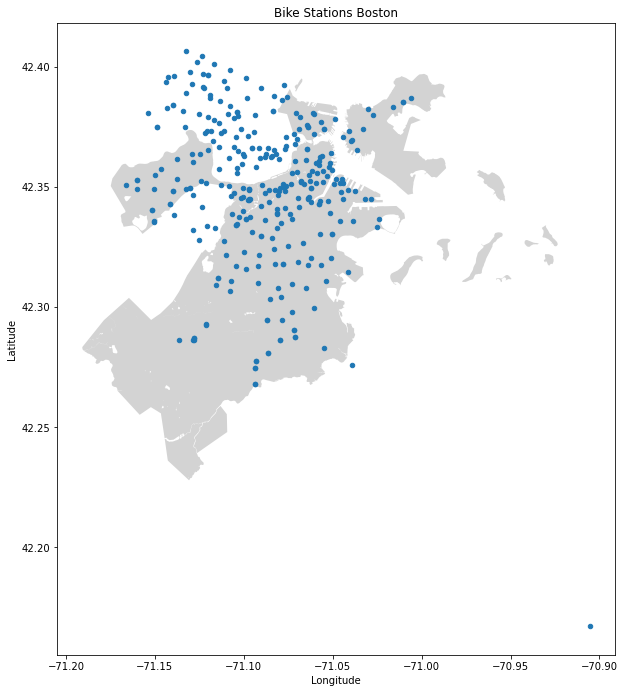

In [66]:
# read data about Boston from file
boston = geopandas.read_file('./data/Shapefiles/City_of_Boston_Boundary/City_of_Boston_Boundary.shp')

# setting default values for our GeoDataFrame
crs = 'EPSG:4326'
geometry = geopandas.points_from_xy(df_station_occurrences.Longitude, df_station_occurrences.Latitude)
# create geo dataframe 
geo_df = geopandas.GeoDataFrame(df_station_occurrences, crs = crs, geometry = geometry)

# plot the data
fig, ax = plt.subplots(figsize = (10,15))
boston.to_crs(epsg=4326).plot(ax = ax, color = 'lightgrey')
geo_df.plot(ax=ax, markersize = 20)
ax.set_title('Bike Stations Boston')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('./figures/boston_station_map.png')

We see that one station is far away from all the others. It is the only location that has the longitude coordinate greater than 70.95. Therefore, it is easy for us to find it and evaluate if this stations should be deleted or not.

In [67]:
df_station_away = df_station_occurrences[df_station_occurrences['Longitude'] > -70.95]
df_station_away.head(5)

occurrence  normalized_occurrence   Latitude  Longitude  \
308          78               0.000736  42.167226 -70.905558   

                       geometry  
308  POINT (-70.90556 42.16723)

In [68]:
# get station that is far away
mask_station_308 = (df_original['start_station_id'] == 308) | (df_original['end_station_id'] == 308)
df_station_308 = df_original[mask_station_308]
df_station_308.head(2)

duration               start_time                end_time  \
1540487       824  2018-10-29 16:23:44.975 2018-10-29 16:37:29.488   
1545840      1381  2018-10-30 12:36:53.158 2018-10-30 12:59:54.738   

         start_station_id start_station_name  start_station_latitude  \
1540487               308       BCBS Hingham               42.167226   
1545840               308       BCBS Hingham               42.167226   

         start_station_longitude  end_station_id end_station_name  \
1540487               -70.905558             308     BCBS Hingham   
1545840               -70.905558             308     BCBS Hingham   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
1540487             42.167226             -70.905558     4253  Subscriber   
1545840             42.167226             -70.905558     4249  Subscriber   

               date hour  
1540487  2018-10-29   16  
1545840  2018-10-30   12

We could remove this station, but we did some research on the internet. We found that this station is intended. Therefore, we don't delete it and just keep it.

# Data Visualization - Task 2

In this task, we will visualize the data to have access to real-time information on the operational performance of the vehicle fleet. We will start with the visualization of the geographical demand patterns, move to the temporal demand patterns and seasonality and finish with KPI's.

## Methods

In [69]:
def visualize_occurrences(number_of_stations, tail, occurrences):
    """
    Visualizes bike rentals from id-columns with barplot
    ...
    Arguments
    ---------
    number_of_stations      : int
                            number of stations to visualize
    ascending               : boolean
                            if True, shows tail of series, else head
    column                  : string
                            column name to aggregate
    """
    # get the first/last values from occurrences series
    if tail:
        values = occurrences.tail(number_of_stations)
    else:
        values = occurrences.head(number_of_stations)
    # plot the most/least used stations
    ax = sns.barplot(x=values.index, y=values.values, estimator=sum, order=values.iloc[::-1].index, palette="magma")
    ax.set(xlabel='station id', ylabel='number of rentals')
    plt.savefig('./figures/occurrences_.png')

In [70]:
def get_demand(df, station_id, column):
    """
    Return the bike demand per station
    ...
    
    Arguments
    ---------
    df                      : pandas.DataFrame
                            dataframe from which the number of rentals should be taken from
    station_id              : int
                            number of stations to visualize
    column                  : string
                            column name to get the demand from
    Returns
    -------
    Bike Demand from dataframe in column for given station id
    """
    return len(df[df[column] == station_id])

In [71]:
# define function to check if datetime is between 2 datetimes
def in_between(now, start, end):
    """
    Checks if an hour is between 2 other hours given pd.datetimes. True if now is between start and end. False if not.
    ...
    
    Arguments
    ---------
    now                     : int
                            the hour to check

    start                   : pd.datetime
                            start datetime
    
    end                     : pd.datetime
                            end datetime
    """
    normalized_now = pd.Timestamp(2000, 1, 1, now, 0, 0, 0)
    normalized_start = pd.Timestamp(2000, 1, 1, start.hour, start.minute, start.second, 0)
    normalized_end = pd.Timestamp(2000, 1, 1, end.hour, end.minute, end.second, 0)
    
    if normalized_start <= normalized_end:
        return normalized_start <= normalized_now < normalized_end
    else :# over midnight e.g., 23: 30 - 04: 15
        return normalized_start <= normalized_now or normalized_now < normalized_end

## Imports for Data Visualizations

In [72]:
from ipyleaflet import CircleMarker, MarkerCluster, Heatmap
from keplergl import KeplerGl

## Geographical Demand Patterns

### Barplots
At first, we want to visualize the number of trips originated and terminated per station. We will visualize the following:
1. Visualize occurrences for start stations (most used ones)
2. Visualize occurrences for end stations (most used ones)
3. Visualize occurrences for start stations (least used ones)
4. Visualize occurrences for end stations (least used ones)
5. Visualize occurrences for start and end stations aggregated (most used ones)
6. Visualize occurrences for start and end stations aggregated (least used ones)


In [73]:
df_original.head(1)

duration               start_time            end_time  start_station_id  \
0       388  2018-01-01 00:16:33.000 2018-01-01 00:23:01               178   

                start_station_name  start_station_latitude  \
0  MIT Pacific St at Purrington St               42.359573   

   start_station_longitude  end_station_id    end_station_name  \
0               -71.101295             107  Ames St at Main St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0               42.3625              -71.08822      643  Subscriber   

         date hour  
0  2018-01-01   00

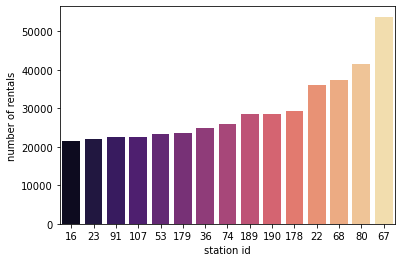

In [74]:
# 1. (most used start stations)
visualize_occurrences(15, False, start_station_occurrences)

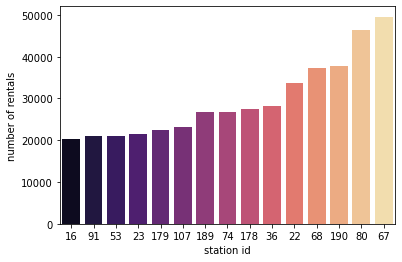

In [75]:
# 2. (most used end stations)
visualize_occurrences(15, False, end_station_occurrences)

The most used start stations are also present in the most used end stations!

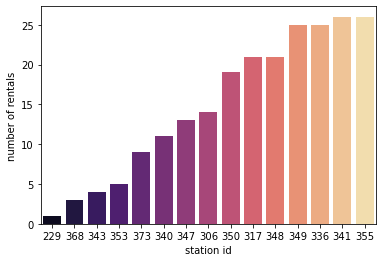

In [76]:
# 3. (least used start stations)
visualize_occurrences(15, True, start_station_occurrences)

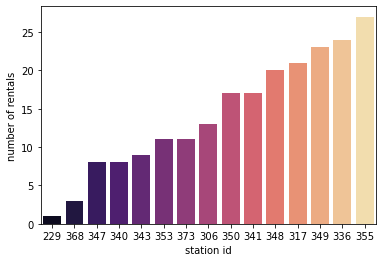

In [77]:
# 4. (least used end stations)
visualize_occurrences(15, True, end_station_occurrences)

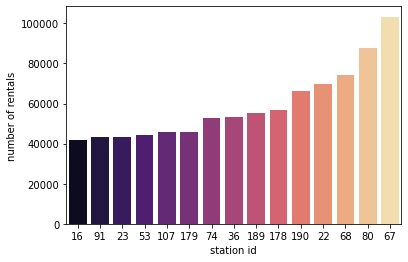

In [78]:
# 5. (mosted trips originated or terminated at a station)
# visualize most used stations
visualize_occurrences(15, False, station_occurrences)

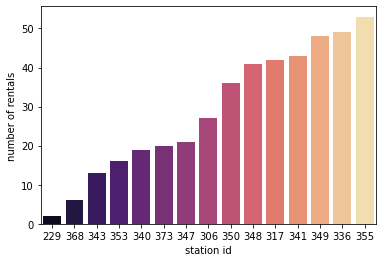

In [79]:
# visualize least used stations (originated + terminated)
visualize_occurrences(15, True, station_occurrences)

All these plots give us a first view on which stations are most and least important. Because the interpretation with barplots is very limited, we will further show the bike demand per station on a map.

### Map (ipyleaflet and matplotlib)

Now, we would also like to visualize the bike demand in a map. For this purpose we use ipyleaflet and geopandas as well as matplotlib.

In [80]:
df_original.head(1)

duration               start_time            end_time  start_station_id  \
0       388  2018-01-01 00:16:33.000 2018-01-01 00:23:01               178   

                start_station_name  start_station_latitude  \
0  MIT Pacific St at Purrington St               42.359573   

   start_station_longitude  end_station_id    end_station_name  \
0               -71.101295             107  Ames St at Main St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0               42.3625              -71.08822      643  Subscriber   

         date hour  
0  2018-01-01   00

#### Heatmap with ipyleaflet

As a first visualization, we use a heatmap offered by ipyleaflet. We create a map and visualize all the stations and their sum of bike rentals. We use the normalized value to represent the distance between the values and scale it with a factor. For visualization purposes a factor of 25 was the best choice.

In [81]:
# create map from boston that is roughly centered 
boston_map = Map(
    center=(df_station_occurrences['Latitude'].mean(), df_station_occurrences['Longitude'].mean()),
    zoom=12)

# create heatmap from stations
heatmap = Heatmap(
    locations = [[df_station_occurrences.iloc[i]['Latitude'], df_station_occurrences.iloc[i]['Longitude'], df_station_occurrences.iloc[i]['normalized_occurrence'] * 25] for i in range(len(df_station_occurrences))],
    radius = 25
)
# add heatmap to map
boston_map.add_layer(heatmap)
boston_map # shop map as output

Map(center=[42.34884296596288, -71.08902092171014], controls=(ZoomControl(options=['position', 'zoom_in_text',…

#### Marker-Cluster with ipyleaflet

Further, we also want to use other visualization tools. Our next visualization is a marker cluster. It creates multiple circles around the stations and visualizes the number of bike rentals at the stations by adjusting the size of the circles. Bigger circles represent a higher bike demand at a certain station.

In [82]:
# create map from boston that is roughly centered 
boston_map_circle = Map(
    center = (df_station_occurrences['Latitude'].mean(), df_station_occurrences['Longitude'].mean()),
    zoom = 13)

# list to store all of our markers
marker_list = []

# adding one marker per station
# as a radius we use the normalized number of bike rentals per station and scale it
for index, item in df_station_occurrences.iterrows():
    marker_list.append(CircleMarker(location=(item['Latitude'], item['Longitude']), radius = int(item['normalized_occurrence'] * 25)))

# create marker cluster
# we disable the clustering at zoom, because otherwise multiple stations would be clustered together
# whereby we would lose the size of the circle on the map
marker_cluster = MarkerCluster(
    markers = marker_list,
    disable_clustering_at_zoom = 1
)

# adding marker layer to map
boston_map_circle.add_layer(marker_cluster);
boston_map_circle

Map(center=[42.34884296596288, -71.08902092171014], controls=(ZoomControl(options=['position', 'zoom_in_text',…

#### Heatmap with Matplotlib

Another method to visualize the number of bike rentals at the stations, is to use the map of boston. Since the government of boston (https://data.boston.gov/dataset/city-of-boston-boundary) offers the map of boston for free, we can use this data and map a set of points onto it.

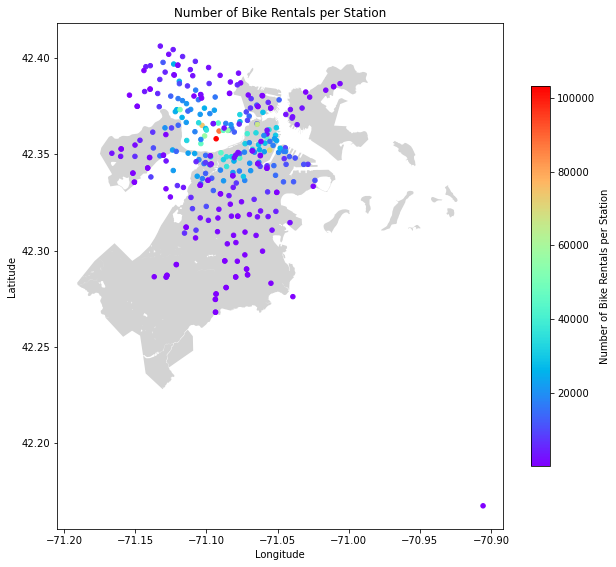

In [83]:
# read data about Boston from file
boston = geopandas.read_file('./data/Shapefiles/City_of_Boston_Boundary/City_of_Boston_Boundary.shp')

# setting default values for our GeoDataFrame
crs = 'EPSG:4326'
geometry = geopandas.points_from_xy(df_station_occurrences.Longitude, df_station_occurrences.Latitude)
# create geo dataframe 
geo_df = geopandas.GeoDataFrame(df_station_occurrences, crs = crs, geometry = geometry)

# plot the data
fig, ax = plt.subplots(figsize = (10,10))
boston.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'occurrence', ax=ax, cmap = 'rainbow',
            legend = True,  legend_kwds={'shrink': 0.7, "label": 'Number of Bike Rentals per Station'},
            markersize = 20)
ax.set_title('Number of Bike Rentals per Station')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('./figures/boston_heat_map.png')

In total, we can see multiple hotspot stations with multiple bike rentals that originate or terminate at these stations. We found out that these are located near these places: <br/>
1. Near the Harvard Bridge, directly next to the Massachusetts Institute of Technology (MIT)
2. Next to Ray & Maria Stata Center
3. Directly next to the Central Square
4. Train Stop Boston North Station
5. Train Stop Boston South Station
<br/>

As we have seen, all of these bike rentals originate or terminate near important places. They are either connected to public transport stations like train stations or generally refer to points of interests like universities or public spaces.

### Map (KeplerGL)

Kepler.gl is a data-independent, WebGL-enabled, high-performance web application for geospatial analytical visualizations. In order to display KeplerGL visualizations, it must be installed beforehand (see installation instructions at the beginning of this notebook).

To start, we take the df_original Dataframe and make a groupby on the start_station_id and store it in the new dataframe df_counts for the visualizations.

In [84]:
df_counts = df_original.groupby('start_station_id').count() 
df_counts.head(2)

duration  start_time  end_time  start_station_name  \
start_station_id                                                       
1                      153         153       153                 153   
3                     6270        6270      6270                6270   

                  start_station_latitude  start_station_longitude  \
start_station_id                                                    
1                                    153                      153   
3                                   6270                     6270   

                  end_station_id  end_station_name  end_station_latitude  \
start_station_id                                                           
1                            153               153                   153   
3                           6270              6270                  6270   

                  end_station_longitude  bike_id  user_type  date  hour  
start_station_id                                                         
1                                   153      153        153   153   153  
3                                  6270     6270       6270  6270  6270

We create a dataframe that contains the number of trips that start at each station. We merge this dataframe with the original dataframe to give us the latitude and longitude of each station. Last, we group by station ID and average the latitude, longitude, and number of trips. 

In [85]:
df_counts.reset_index(inplace = True)
df_counts = df_counts[['start_station_id', 'start_time']]
df_counts.rename(columns = {'start_time':'counts'}, inplace = True)

In [86]:
df_kepler = df_counts.merge(df_original, left_on = 'start_station_id', right_on = 'start_station_id', how = 'left')
df_kepler = df_kepler.groupby('start_station_id').mean().reset_index()
df_kepler.head(3)

start_station_id   counts     duration  start_station_latitude  \
0                 1    153.0  1327.810458               42.387151   
1                 3   6270.0  1142.427113               42.340115   
2                 4  10212.0   901.812671               42.345392   

   start_station_longitude  end_station_id  end_station_latitude  \
0               -71.075978       98.928105             42.376776   
1               -71.100619       68.870335             42.349079   
2               -71.069616       81.673228             42.350417   

   end_station_longitude      bike_id  
0             -71.094108  2855.732026  
1             -71.090801  2343.239553  
2             -71.069401  2312.004113

In order that the visualizations have the given configurations and settings, this was created and saved in advance. For space reasons we have outsourced them.

In [87]:
with open("./data/json/bin_map_config.json") as f:
    data_bin_map = json.load(f)
bin_map_config = data_bin_map

with open("./data/json/heat_map_config.json") as f:
    data_heat_map = json.load(f)
heat_map_config = data_heat_map

with open("./data/json/start_end_map_config.json") as f:
    start_end_map = json.load(f)
start_end_map_config = start_end_map

with open("./data/json/start_to_end_map_config.json") as f:
    start_to_end_map = json.load(f)
start_to_end_config = start_to_end_map

with open("./data/json/grid_map_config.json") as f:
    grid_map = json.load(f)
grid_map_config = grid_map

We create a new map object and pass the height and configuration of the Map to it using the function KeplerGL. 

After that, the dataframe df_kepler is passed to the visualization. 

In [88]:
# create map object
bin_map= KeplerGl(height = 600, config = bin_map_config)

bin_map.add_data(data = df_kepler, name = 'data')
bin_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'p0mi50i', 'type': …

In [89]:
# create map object
heat_map= KeplerGl(height=600, config=heat_map_config)

heat_map.add_data(data=df_kepler, name='data')
heat_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '2yniyjn', 'type': …

In [90]:
# create map object
start_end_map= KeplerGl(height = 600, config = start_end_map_config)

start_end_map.add_data(data = df_kepler, name='data')

#red = start // blue = end
start_end_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'qf09nu', 'type': '…

In [91]:
 # create map object
start_to_end_map= KeplerGl(height = 600, config = start_to_end_config)

start_to_end_map.add_data(data = df_kepler, name = 'data')

#red shows the start station and yellow shows the end station
start_to_end_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'qf09nu', 'type': '…

In [92]:
# create map object
grid_map = KeplerGl(height = 600, config = grid_map_config)

grid_map.add_data(data = df_kepler, name = 'data')

grid_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '1jcvg4q', 'type': …

## Temporal Demand Patterns and Seasonality

In [93]:
df_analytics.head(2)

date_time  max_temp  min_temp precip       date hour weekday  \
0 2018-01-01 00:00:00     -12.8     -12.8    0.0 2018-01-01   00  Monday   
1 2018-01-01 01:00:00     -13.3     -13.3    0.0 2018-01-01   01  Monday   

     month  season is_holiday is_workingday is_weekend  avg_temp  count  \
0  January  Winter        Yes            No         No     -12.8    4.0   
1  January  Winter        Yes            No         No     -13.3    6.0   

   unique_bike_ids  
0              4.0  
1              6.0

### Hourly Demand of Bike Rentals

We create a new dataframe with the bike demand for each hour, which is the hourly cumulated demand and plot it. The visualization shows that in the sum, in the morning a lot of bikes are used, as well as in the afternoon. Most possibly this is the case, because a lot of people use the bikes to ride to their jobs in the morning and back to their home in the afternoon.

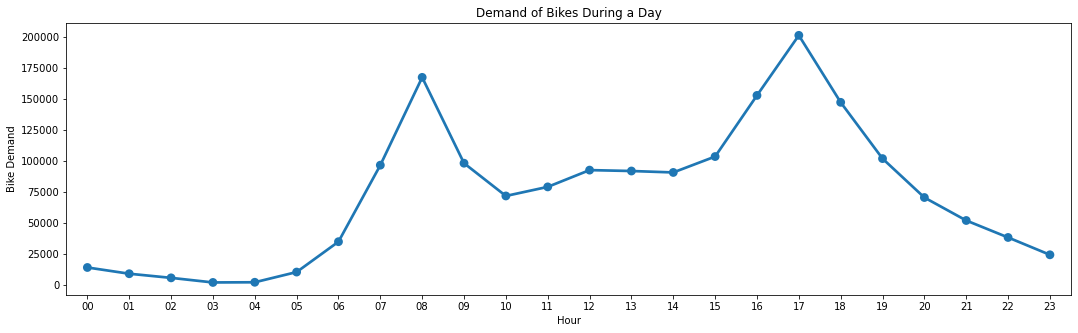

In [94]:
df_hourly_demand = df_analytics.groupby(by = 'hour')['count'].apply(lambda x: sum(x)).to_frame().reset_index()

figure, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(data = df_hourly_demand, x = 'hour', y = 'count')
ax.set(title = 'Demand of Bikes During a Day')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')
plt.savefig('./figures/hourly_demand_of_bike_rentals.png')

### Demand of Bikes During Weekdays

Here, we also plot the hourly demand. But this time, we do not cumulate them and differentiate between each weekday and plot each weekday with a different color.

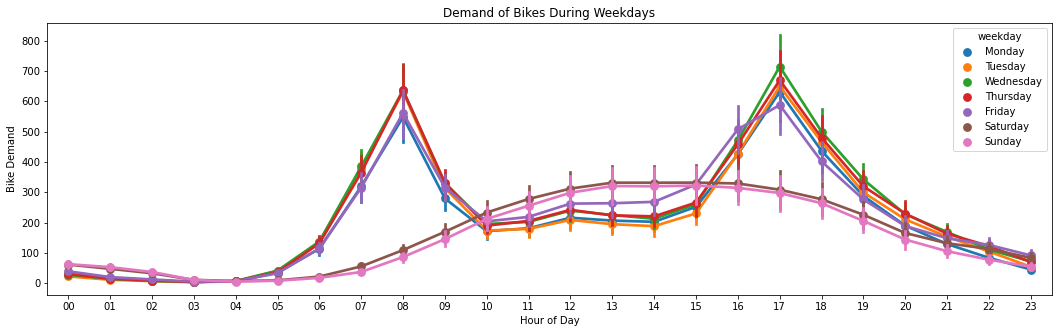

In [95]:
figure, ax = plt.subplots(figsize = (18, 5))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.pointplot(data = df_analytics, x = 'hour', y = 'count', hue = 'weekday', ax = ax, hue_order = order)
ax.set(title = 'Demand of Bikes During Weekdays')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour of Day')
plt.savefig('./figures/weekday_demand_of_bike_rentals.png')

### Weekly Demand of Bike Rentals

The next plot shows the demand for each weekday. In comparison to the visualization above, the demand is cumulated for each weekday. For this purpose, we group the data by weekday and sum up the bike demand for each weekday in the dataframe.

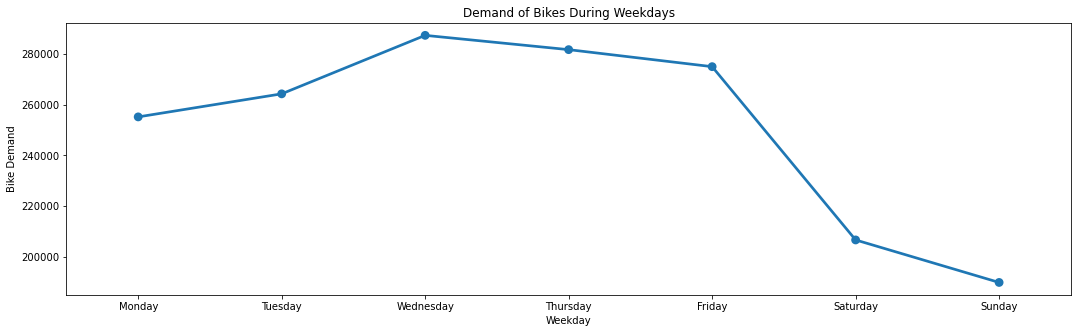

In [96]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_weekly_demand = df_analytics.groupby(by = 'weekday')['count'].apply(lambda x: sum(x)).to_frame().reindex(order).reset_index()

figure, ax = plt.subplots(figsize = (18, 5))
sns.pointplot(data = df_weekly_demand, x = 'weekday', y = 'count')
ax.set(title = 'Demand of Bikes During Weekdays')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Weekday')
plt.savefig('./figures/weekly_demand_of_bike_rentals.png')

### Demand of Bikes During Precip Yes/No

In the following, we look at the difference of the bike demand based on whether there is precip or not. As the plot clearly shows, the demand is higher when there is no precip.

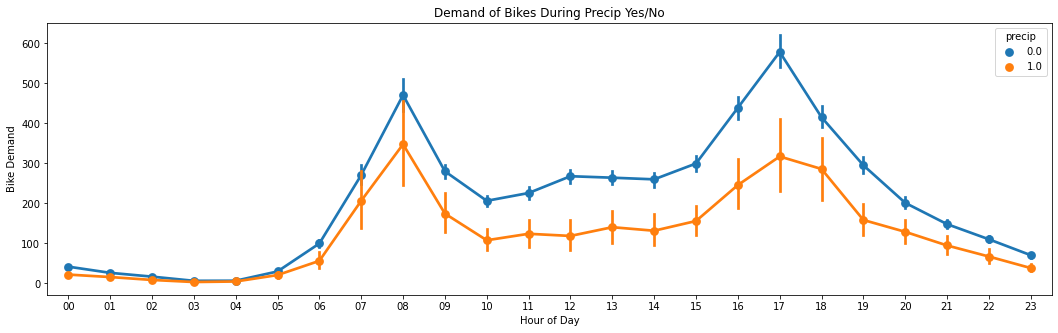

In [97]:
figure, ax = plt.subplots(figsize = (18, 5))
sns.pointplot(data=df_analytics, x = 'hour', y = 'count', hue = 'precip', ax = ax)
ax.set(title = 'Demand of Bikes During Precip Yes/No')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour of Day')
plt.savefig('./figures/precip_demand_of_bike_rentals.png')

### Demand of Bikes During Months

In the next plot, the bike demand is visualized based on the month.

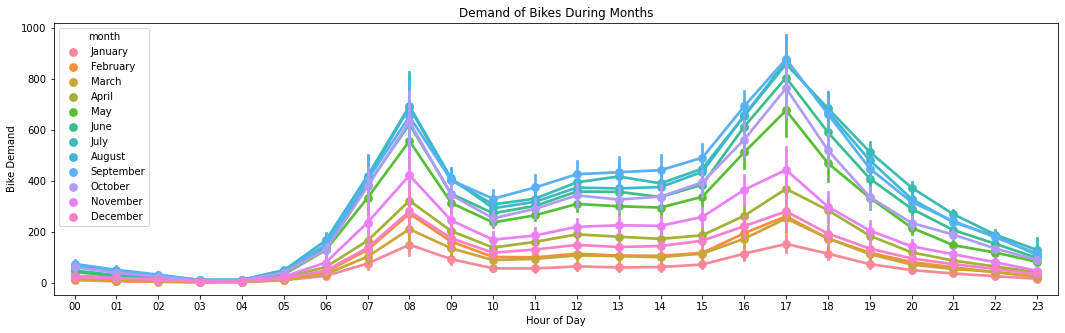

In [98]:
figure, ax = plt.subplots(figsize = (18, 5))
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.pointplot(data = df_analytics, x = 'hour', y = 'count', hue = 'month', ax = ax, hue_order = order)
ax.set(title = 'Demand of Bikes During Months')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour of Day')
plt.savefig('./figures/monthly_demand_of_bike_rentals_during_hours.png')

### Monthly Demand of Bike Rentals

In the plot above, the bike demand was not cumulated. Below, we cumulate the demand and visualize it for each month. For this purpose, we group the dataframe by month and sum up the demand for each month.

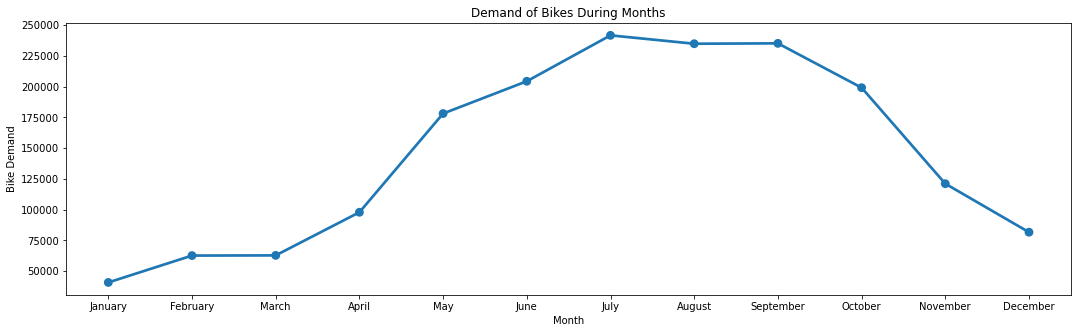

In [99]:
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_yearly_demand = df_analytics.groupby(by = 'month')['count'].apply(lambda x: sum(x)).to_frame().reindex(order).reset_index()

figure, ax = plt.subplots(figsize = (18, 5))
sns.pointplot(data = df_yearly_demand, x = 'month', y = 'count')
ax.set(title = 'Demand of Bikes During Months')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Month')
plt.savefig('./figures/monthly_demand_of_bike_rentals.png')

### Demand of Bikes During Different Seasons

Like the plot for the months, we visualize the non cumulated demand for each season in different colors.

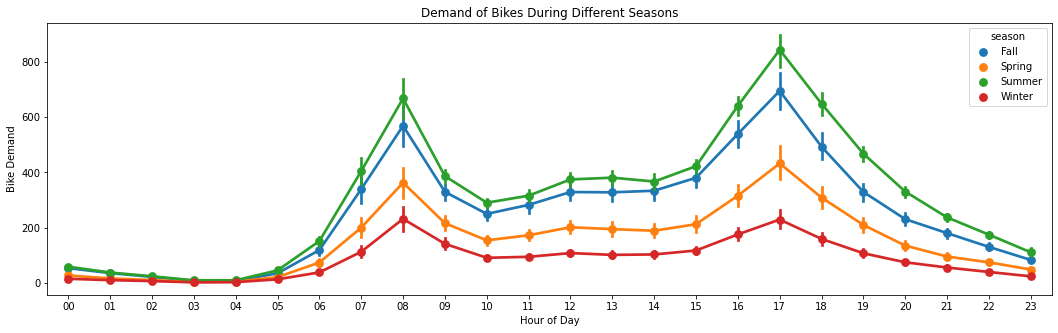

In [100]:
figure, ax = plt.subplots(figsize = (18, 5))
sns.pointplot(data = df_analytics, x = 'hour', y = 'count', hue = 'season', ax = ax)
ax.set(title = 'Demand of Bikes During Different Seasons')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour of Day')
plt.savefig('./figures/seasonal_demand_of_bike_rentals_per_hours.png')

### Seasonly Demand of Bike Rentals

And here is the demand which is grouped by the season and then cumulated by summing up the demand.

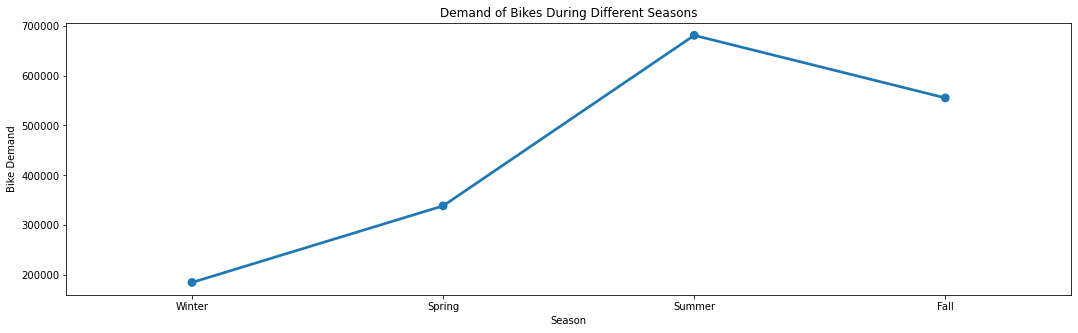

In [101]:
order = ['Winter', 'Spring', 'Summer', 'Fall']
df_seasonal_demand = df_analytics.groupby(by = 'season')['count'].apply(lambda x: sum(x)).to_frame().reindex(order).reset_index()

figure, ax = plt.subplots(figsize = (18, 5))
sns.pointplot(data = df_seasonal_demand, x = 'season', y = 'count')
ax.set(title = 'Demand of Bikes During Different Seasons')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Season')
plt.savefig('./figures/seasonal_demand_of_bike_rentals.png')

### Correlation between Minimum and Maximum Temperature and Bike Demand

In the next plot, the correlation between the minimum temperature and the maximum temperature is shown. The red line shows the average. We can clearly see that the temperature has an influence on the demand.

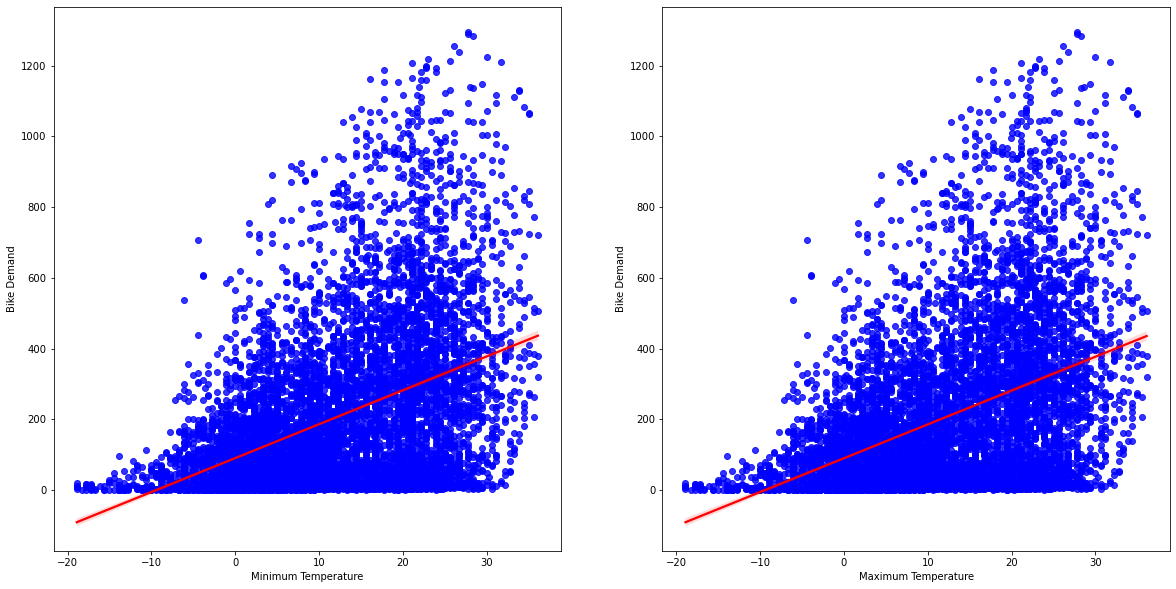

In [102]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
sns.regplot(x = "min_temp", y = "count", data = df_analytics, ax = ax1, scatter_kws = 
            {"color": "blue"}, line_kws = {"color": "red"})
sns.regplot(x = "max_temp", y = "count", data = df_analytics, ax = ax2, scatter_kws = 
            {"color": "blue"}, line_kws = {"color": "red"})
ax1.set_xlabel('Minimum Temperature')
ax2.set_xlabel('Maximum Temperature')
ax1.set_ylabel('Bike Demand')
ax2.set_ylabel('Bike Demand')
plt.savefig('./figures/correlation_min_max_temperature_and_bike_demand.png')

## KPI (1) - Bike Utilization per Hour

In this KPI, we would like to get the bike utilization per hours. Therefore, we calculate how many unique bike ids are used per hour and sum them up. Then, we divide this number by 365 to get the average number of unique bikes rented and divide it through the total number of bikes. We receive a percentage that represents the average fleet utilization.

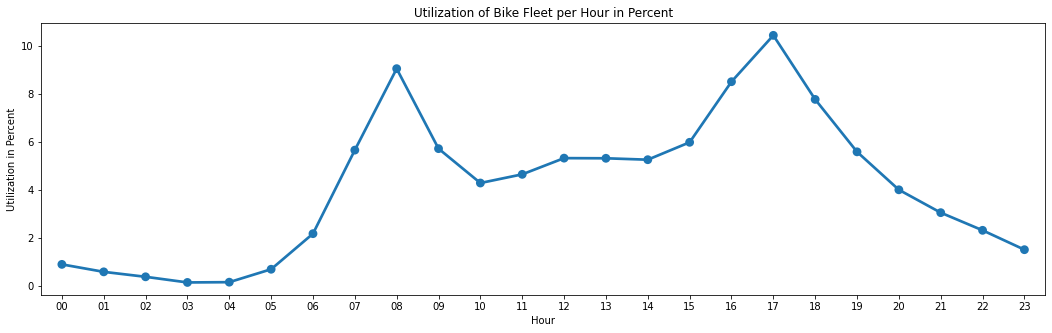

In [103]:
df_hourly_utilization = df_analytics.groupby(by = 'hour')['unique_bike_ids'].apply(lambda x: sum(x)).to_frame().reset_index()
df_hourly_utilization['utilization_in_percent'] = ((df_hourly_utilization['unique_bike_ids'] / 365) / df_original['bike_id'].nunique()) * 100

figure, ax = plt.subplots(figsize = (18, 5))
sns.pointplot(data = df_hourly_utilization, x = 'hour', y = 'utilization_in_percent')
ax.set(title = 'Utilization of Bike Fleet per Hour in Percent')
ax.set_ylabel('Utilization in Percent')
ax.set_xlabel('Hour')
plt.savefig('./figures/utilization_fleet_per_hour_in_percent.png')

## KPI (2) - Number of Active Used Bikes per Hour

Now, we also want to get a feeling for the active used bikes per hour. To achieve this, we use the above defined function in_between, that checks if a datetime is between two other datetimes. We use this function to calculate the total amount of bikes that are actively used per hour. For example, if a bike rental originated at 01:00 and terminated at 03:15 the same day, our calculations would include a bike count for the hours 1, 2 and 3.

In [104]:
# create df for cumulated hourly demand
df_cumulated_hourly_demand = pd.DataFrame(columns = ['demand'])
# transform demand column to numeric
df_cumulated_hourly_demand['demand'] = pd.to_numeric(df_cumulated_hourly_demand['demand'])
df_cumulated_hourly_demand.info()
# transform start_time column of df_original to datetime
df_original['start_time'] = pd.to_datetime(df_original['start_time'])

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   demand  0 non-null      int64
dtypes: int64(1)
memory usage: 0.0+ bytes


We calculate the total amount of bikes actively used within an hour by calculating the beginning hour and the last hour to see which hours are counted for the bike. We also use the in_between help function for the calculation to see if one hour is between start and end time.

In [105]:
# calculate cumulated demand for each hour and write in df_cumulated_hourly_demand
for i in range(24):
    df_cumulated_hourly_demand.loc[i, 'demand'] = len(df_original[
        (df_original['start_time'].dt.hour == i) 
        | (df_original['end_time'].dt.hour == i) 
        | (in_between(i, df_original.at[i, 'start_time'], df_original.at[i, 'end_time']))])

df_cumulated_hourly_demand.head(5)

demand
0  19381.0
1  12263.0
2   8155.0
3   3368.0
4   2856.0

Below, we plot the dataframe that was built previously. 

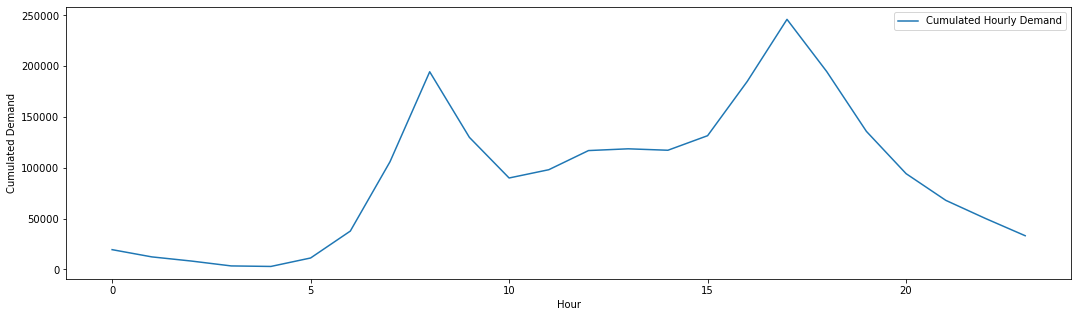

In [106]:
# plot cumulated hourly demand
df_cumulated_hourly_demand.plot(kind = 'line', y = 'demand', use_index = True,  label = 'Cumulated Hourly Demand', figsize = (18, 5))
plt.xlabel('Hour')
plt.ylabel('Cumulated Demand')
plt.savefig('./figures/cumulated_hourly_demand.png')
plt.show()

## KPI (3) - Bike Utilization per User Type

We also would like to include the utilization along user types as a KPI. Therefore, we analyse the proportion of users who are subscribers and those who are standard customers without a subscription. First of all we look at the numbers for the whole year and afterwards, we go into detail and examine the numbers on a hourly basis.

In [107]:
df_original['user_type'].describe()

count        1760180
unique             2
top       Subscriber
freq         1434577
Name: user_type, dtype: object

From above, we know that from our two user types (Customers and Subscribers) Subscribers are the most common user type in our dataframe. They represent 1434577 out of 1760180 entries. The following barchart shows this proportions, including the percentage shares of the user types looking at the entire dataframe.

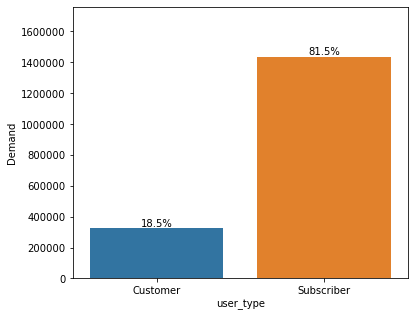

In [108]:
# plot size
plt.figure(figsize = (6,5))
# plain turns off scientific notation (without we would have 0-1,6 on y-Axis and 1e6 as factor label)
plt.ticklabel_format(style = 'plain', axis = 'y')
# plot of diagram
ax = sns.countplot(x = "user_type", data = df_original)
ax.set(ylabel = "Demand")
ax.set_ylim(0, 1760180)

# add percentage shares for user types
for c in ax.containers:
    # custom label calculates respective percentages
    labels = [f'{v.get_height() / df_original.user_type.count() * 100:0.1f}%' for v in c]
    ax.bar_label(c, labels = labels)
plt.savefig('./figures/bike_utilization_user_type.png')    
plt.show()

To analyse the distribution of the average use per hour per user type, we create two columns in our dataset for the user types and fill them with their respective usage.

In [109]:
# create dfs for hourly demand by user group
df_users_hourly = pd.DataFrame(columns = ['Subscriber', 'Customer'])

# transform demand column to numeric format
df_users_hourly['Subscriber'] = pd.to_numeric(df_users_hourly['Subscriber'])
df_users_hourly['Customer'] = pd.to_numeric(df_users_hourly['Customer']) 

In [110]:
for i in range(24):
    df_users_hourly.at[i,'Subscriber'] = len(df_original[(df_original['start_time'].dt.hour == i) & (df_original['user_type'] == 'Subscriber')])
    df_users_hourly.at[i,'Customer'] = len(df_original[(df_original['start_time'].dt.hour == i) & (df_original['user_type'] == 'Customer')])
df_users_hourly.head(5)

Subscriber  Customer
0     10369.0    3838.0
1      6126.0    3046.0
2      3807.0    2036.0
3      1530.0     617.0
4      1920.0     366.0

Subsequently, the figure below shows the distribution of the average usage in 2018 for the customers and for the subscribers on an hourly level.

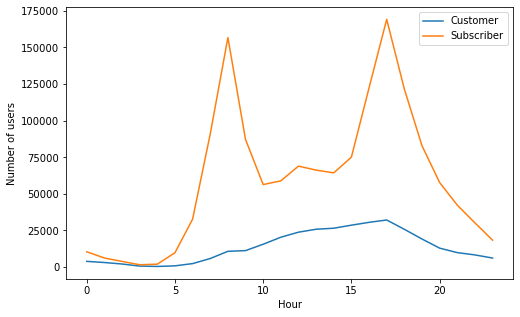

In [111]:
plt.figure(figsize = (8,5))
plt.xlabel('Hour')
plt.ylabel('Number of users')

plt.plot(df_users_hourly.index, df_users_hourly['Customer'], label = 'Customer')
plt.plot(df_users_hourly.index, df_users_hourly['Subscriber'], label = 'Subscriber')
plt.legend(loc = "upper right")
plt.savefig('./figures/bike_utilization_user_type_per_hour.png')
plt.show()

## KPI (4) - Traffic per Station

In this KPI, we care about the traffic per station. This refers to the hourly number of bikes that are rented or parked at different stations over the course of the year.

First, we look at the hourly values for bikes rented, to do so, we only consider listings of the column start_station.

In [112]:
# grouping the dataframe to get the number of bikes per start station for each hour of the day
df_traffic_start = df_original.groupby(by = ['start_station_id', 'hour']).size().to_frame('sum').reset_index()
df_traffic_start.head(5)

start_station_id hour  sum
0                 1   08    1
1                 1   09    2
2                 1   10    3
3                 1   11    9
4                 1   12   13

We turn the obtained table into a wideframe format and fill not existing listings with 0. The wideframe format allows for better plotting of the collected values. Since the column names are the station_id numbers we have to convert their data type to string to adress them later on.

In [113]:
# turn dataframe into wideframe
df_traffic_start = df_traffic_start.pivot("hour", "start_station_id", "sum")
df_traffic_start = df_traffic_start.fillna(value = 0)
# convert the data type of the name of columns from numeric to string
df_traffic_start.columns = df_traffic_start.columns.map(str)
df_traffic_start.head(5)

start_station_id    1     3      4      5      6     7     8      9     10  \
hour                                                                         
00                0.0  57.0  146.0  121.0  104.0  16.0  60.0  104.0  113.0   
01                0.0  28.0   85.0   95.0   78.0  11.0  59.0   35.0   60.0   
02                0.0  21.0   54.0   48.0   49.0   4.0  43.0   59.0   27.0   
03                0.0   5.0    6.0   12.0   11.0   0.0  11.0   25.0   18.0   
04                0.0   5.0    9.0   14.0   21.0   3.0  15.0   14.0    7.0   

start_station_id    11  ...  368   369  370  371  372  373  374  376  377  378  
hour                    ...                                                     
00                73.0  ...  0.0   9.0  7.0  0.0  3.0  0.0  3.0  0.0  5.0  1.0  
01                25.0  ...  0.0  21.0  2.0  0.0  7.0  0.0  4.0  0.0  0.0  0.0  
02                29.0  ...  0.0   3.0  0.0  0.0  1.0  0.0  6.0  0.0  0.0  0.0  
03                 5.0  ...  0.0   2.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
04                 4.0  ...  0.0   1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 314 columns]

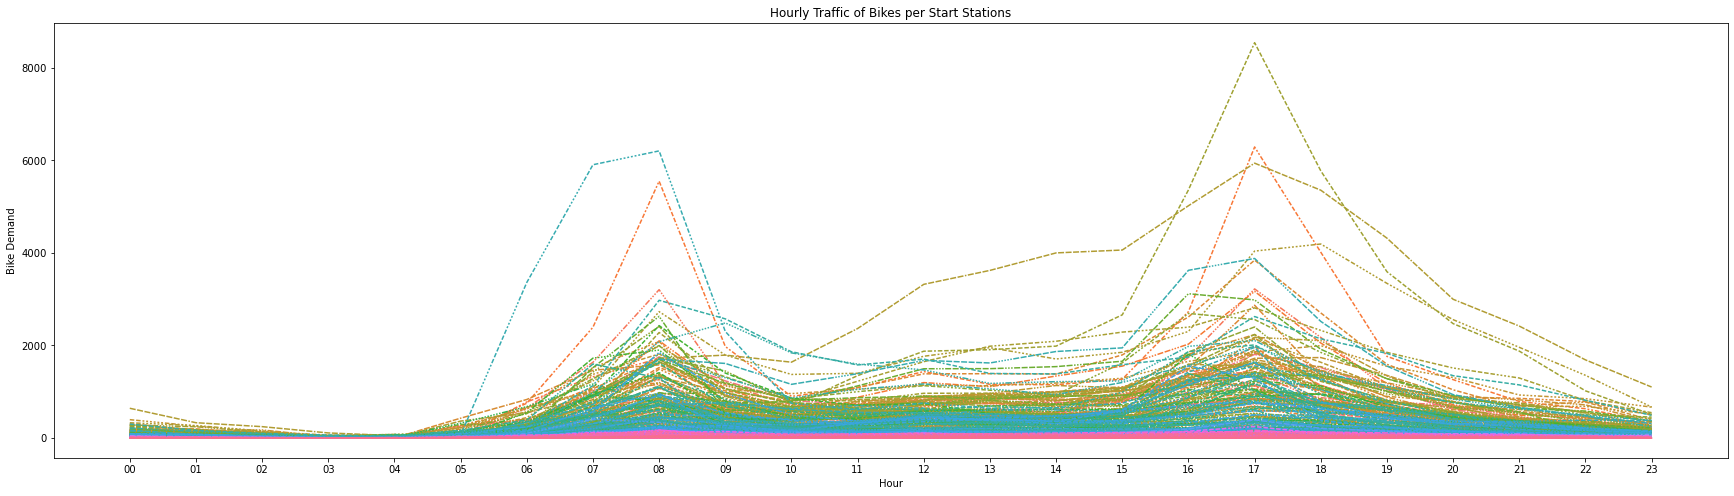

In [114]:
# settings for plotting
figure, ax = plt.subplots(figsize = (30, 8))
ax.set(title = 'Hourly Traffic of Bikes per Start Stations')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')
# plot for every start station
# we disable the legend, because there are way too many stations to list them all up in a legend
sns.lineplot(data = df_traffic_start, legend = False)
plt.savefig('./figures/hourly_traffic_per_stations_all.png')

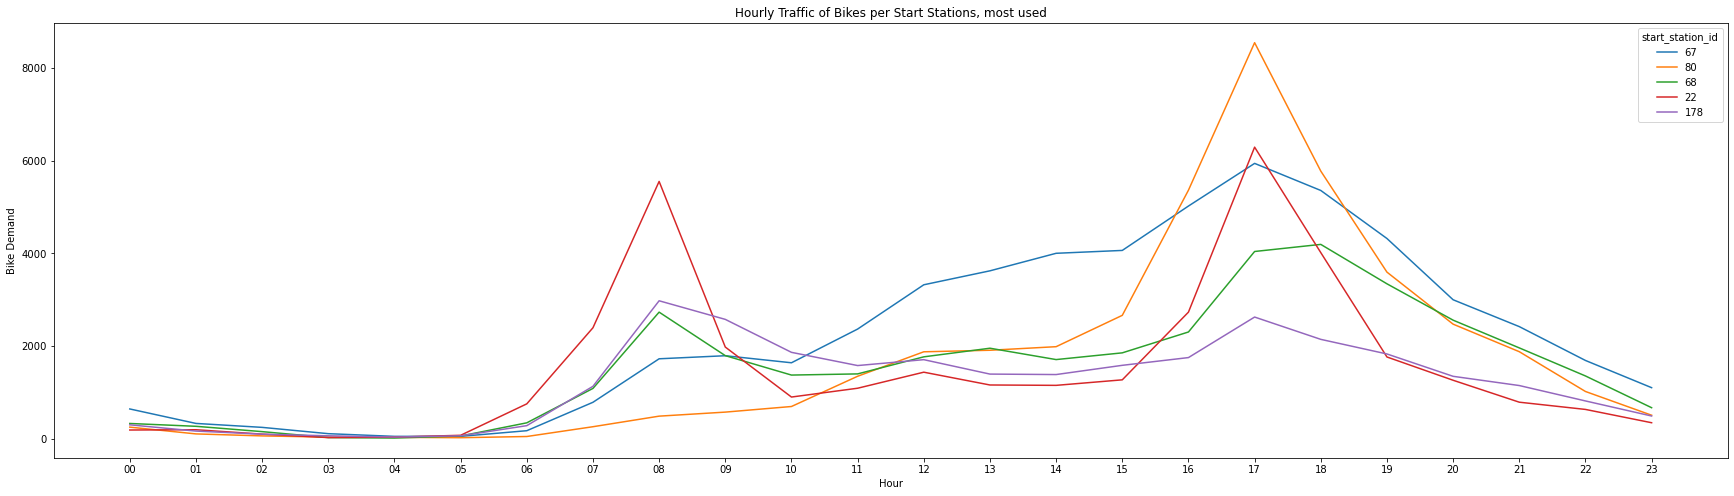

In [115]:
# settings for plotting
figure, ax = plt.subplots(figsize = (30, 8))
ax.set(title = 'Hourly Traffic of Bikes per Start Stations, most used')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')

station_ids_most = []
# most used start stations
for i in range(5):
    station_id = start_station_occurrences.index[i]
    station_ids_most.append(station_id)
    sns.lineplot(data = df_traffic_start[str(station_id)])

plt.legend(title = 'start_station_id', labels = station_ids_most)
plt.savefig('./figures/hourly_traffic_per_stations_most_used.png')

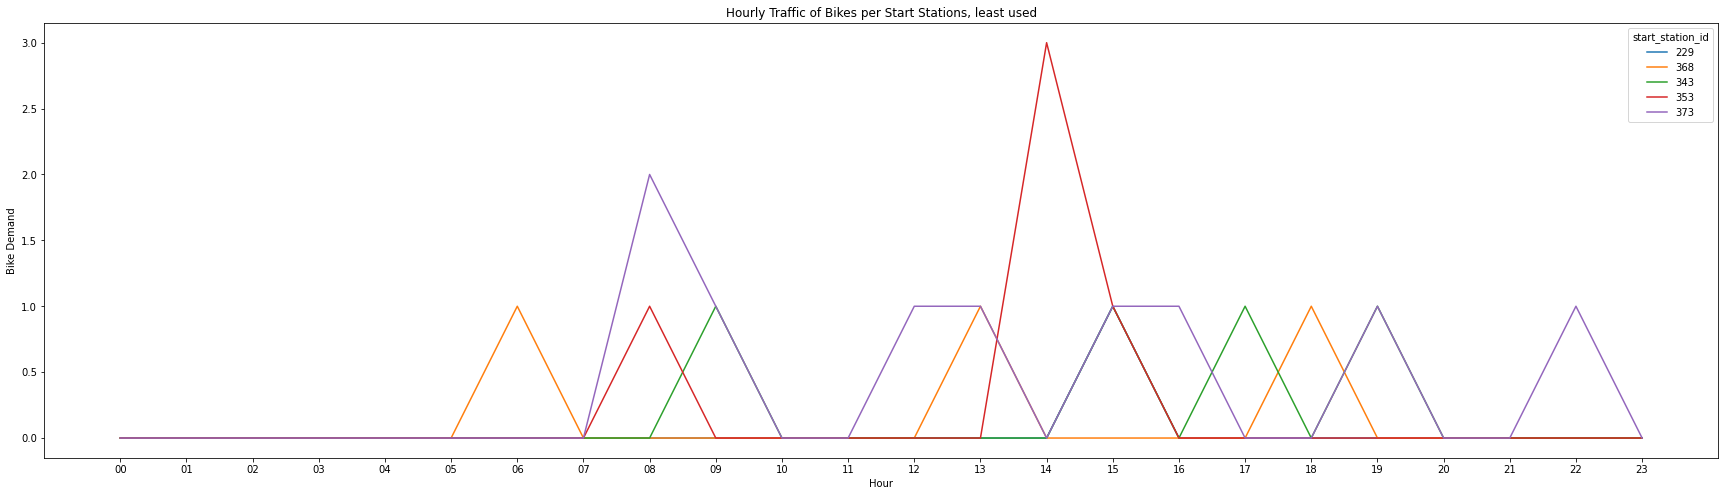

In [116]:
# settings for plotting
figure, ax = plt.subplots(figsize = (30, 8))
ax.set(title = 'Hourly Traffic of Bikes per Start Stations, least used')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')

station_ids_least = []
# least used start stations
for i in range(5):
    station_id = start_station_occurrences.sort_values(ascending = True).index[i]
    station_ids_least.append(station_id)
    sns.lineplot(data = df_traffic_start[str(station_id)])


plt.legend(title = 'start_station_id', labels = station_ids_least)
plt.savefig('./figures/hourly_traffic_per_stations_least_used.png')

Next, we do the same for the end stations. Therefore, we look at the parked bikes for each hour per station over the course of the year.

In [117]:
# add the end_hour column to the dataframe containing only the hour of end_time
df_original['end_time'] = df_original['end_time'].astype(str)
df_original['end_hour'] = df_original.end_time.apply(lambda x : x.split()[1].split(":")[0])
df_original

duration              start_time                 end_time  \
0             388 2018-01-01 00:16:33.000  2018-01-01 00:23:01.000   
1             265 2018-01-01 00:42:00.000  2018-01-01 00:46:25.000   
2            1167 2018-01-01 00:42:44.000  2018-01-01 01:02:11.000   
3             855 2018-01-01 00:56:50.000  2018-01-01 01:11:06.000   
4             487 2018-01-01 01:07:54.000  2018-01-01 01:16:02.000   
...           ...                     ...                      ...   
1760175       444 2018-12-31 23:31:50.529  2018-12-31 23:39:14.565   
1760176       488 2018-12-31 23:48:46.706  2018-12-31 23:56:55.629   
1760177      1555 2018-12-31 23:51:19.859  2019-01-01 00:17:15.741   
1760178       181 2018-12-31 23:54:16.753  2018-12-31 23:57:17.965   
1760179       291 2018-12-31 23:54:38.885  2018-12-31 23:59:30.718   

         start_station_id                           start_station_name  \
0                     178              MIT Pacific St at Purrington St   
1                      78                    Union Square - Somerville   
2                      16  Back Bay T Stop - Dartmouth St at Stuart St   
3                      69      Coolidge Corner - Beacon St @ Centre St   
4                       4                  Tremont St at E Berkeley St   
...                   ...                                          ...   
1760175               107                           Ames St at Main St   
1760176                19                        Park Dr at Buswell St   
1760177                68        Central Square at Mass Ave / Essex St   
1760178               352                                      Ring Rd   
1760179               352                                      Ring Rd   

         start_station_latitude  start_station_longitude  end_station_id  \
0                     42.359573               -71.101295             107   
1                     42.379807               -71.093870             225   
2                     42.348074               -71.076570              76   
3                     42.341598               -71.123338             177   
4                     42.345392               -71.069616              46   
...                         ...                      ...             ...   
1760175               42.362500               -71.088220              90   
1760176               42.347241               -71.105301             179   
1760177               42.365070               -71.103100              68   
1760178               42.348278               -71.080449              36   
1760179               42.348278               -71.080449              36   

                                          end_station_name  \
0                                       Ames St at Main St   
1        Cambridge Dept. of Public Works -147 Hampshire...   
2        Central Sq Post Office / Cambridge City Hall a...   
3                                          University Park   
4        Christian Science Plaza - Massachusetts Ave at...   
...                                                    ...   
1760175        Lechmere Station at Cambridge St / First St   
1760176                                      MIT Vassar St   
1760177              Central Square at Mass Ave / Essex St   
1760178        Copley Square - Dartmouth St at Boylston St   
1760179        Copley Square - Dartmouth St at Boylston St   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
0                   42.362500             -71.088220      643  Subscriber   
1                   42.371197             -71.097599     1581  Subscriber   
2                   42.366426             -71.105495      173  Subscriber   
3                   42.362648             -71.100061     1772  Subscriber   
4                   42.343666             -71.085824     1183  Subscriber   
...                       ...                    ...      ...         ...   
1760175             42.370677             -71.076529     2673  Subscriber   
17601

In [118]:
# grouping the dataframe to get the number of bikes per end_station for each hour of the day
df_traffic_end = df_original.groupby(by = ['end_station_id','end_hour']).size().to_frame('sum').reset_index()
df_traffic_end.head(5)

end_station_id end_hour  sum
0               1       06    4
1               1       07    1
2               1       08  129
3               1       09   83
4               1       10   11

Like we did with the start stations, we turn the previously obtained table for the end stations to wideframe format.

In [119]:
# turn dataframe into wideframe
df_traffic_end = df_traffic_end.pivot('end_hour', 'end_station_id', 'sum')
df_traffic_end = df_traffic_end.fillna(value = '0')
# convert the date type of the name of columns from numeric to string
df_traffic_end.columns = df_traffic_end.columns.map(str)
df_traffic_end.head(5)

end_station_id  1     3     4      5      6    7     8      9     10    11  \
end_hour                                                                     
00              0  60.0  97.0  129.0  103.0  6.0  83.0  120.0  141.0  31.0   
01              0  46.0  31.0   89.0   75.0  2.0  58.0   94.0   87.0  22.0   
02              0  26.0  27.0   63.0   35.0  4.0  30.0   54.0   42.0  13.0   
03              0  14.0  12.0   10.0   11.0  5.0  21.0   23.0   17.0  11.0   
04              0   4.0   5.0   13.0   40.0  4.0   1.0   14.0   15.0  22.0   

end_station_id  ...  368  369  370  371   372  373  374  376   377  378  
end_hour        ...                                                      
00              ...    0  7.0  4.0    0  13.0    0    0  2.0  13.0  3.0  
01              ...    0  2.0  4.0  1.0   3.0    0  1.0    0   5.0    0  
02              ...    0  4.0  3.0    0     0    0  1.0    0   5.0  1.0  
03              ...    0  1.0  1.0    0   1.0    0  1.0    0   1.0  1.0  
04              ...    0    0    0    0     0    0  9.0    0     0    0  

[5 rows x 314 columns]

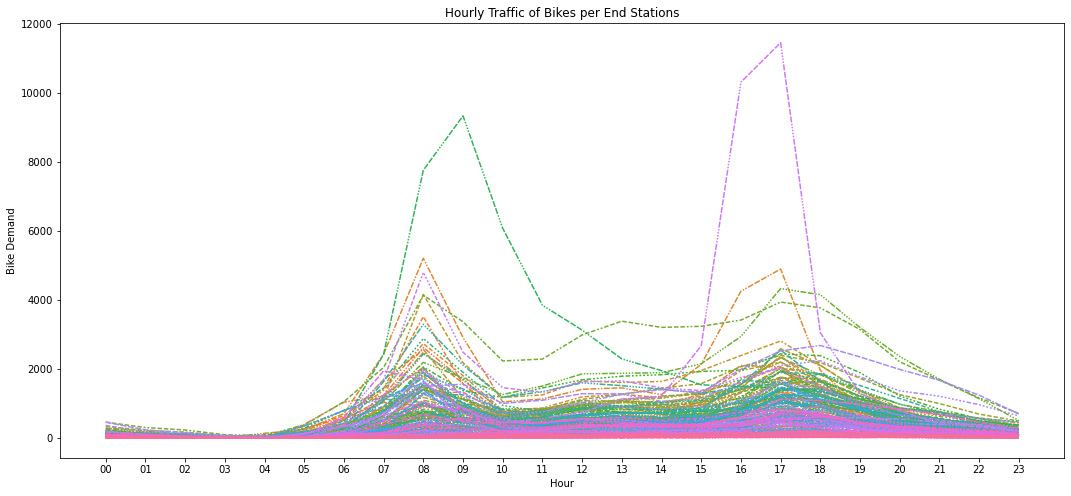

In [120]:
# settings for plotting
figure, ax = plt.subplots(figsize = (18, 8))
ax.set(title = 'Hourly Traffic of Bikes per End Stations')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')
# plot for every end station
# legend is false, because there are way too many stations
sns.lineplot(data = df_traffic_end, legend = False)
plt.savefig('./figures/hourly_traffic_per_stations_end_all.png')

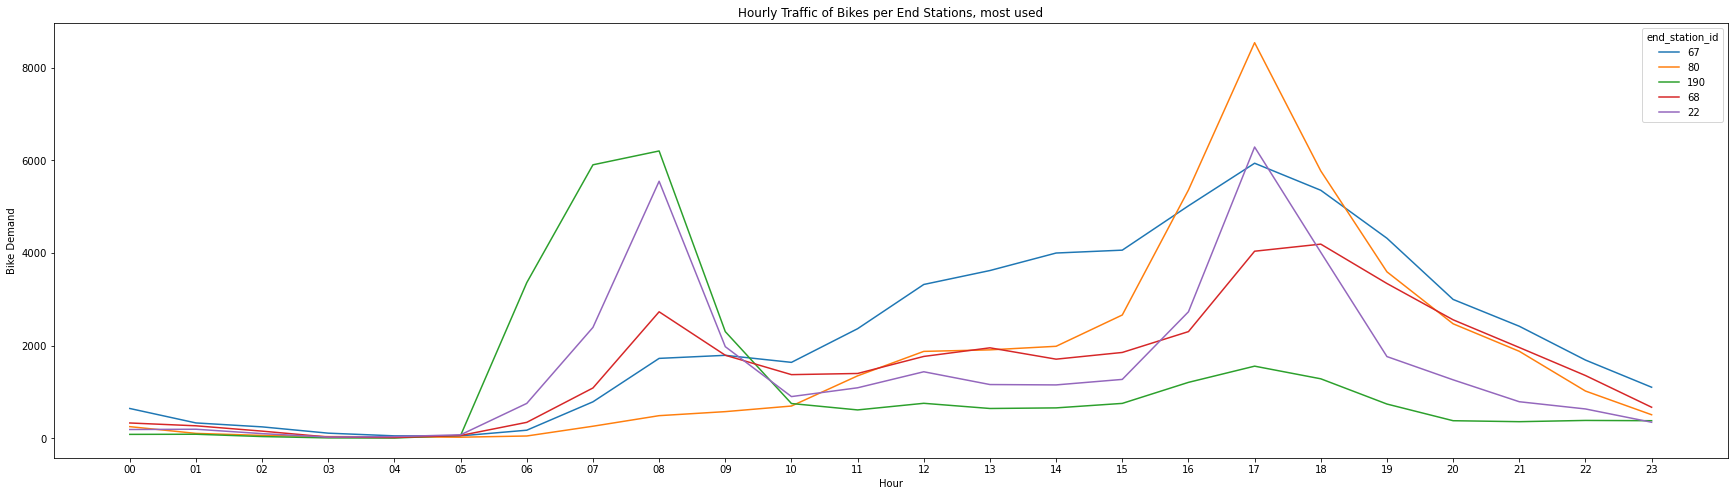

In [121]:
# settings for plotting
figure, ax = plt.subplots(figsize = (30, 8))
ax.set(title = 'Hourly Traffic of Bikes per End Stations, most used')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')

end_ids_most = []
# most used end stations
for i in range(5):
    station_id = end_station_occurrences.sort_values(ascending = False).index[i]
    end_ids_most.append(station_id)
    sns.lineplot(data = df_traffic_start[str(station_id)])

plt.legend(title  = 'end_station_id', labels = end_ids_most)
plt.savefig('./figures/hourly_traffic_per_stations_end_most.png')

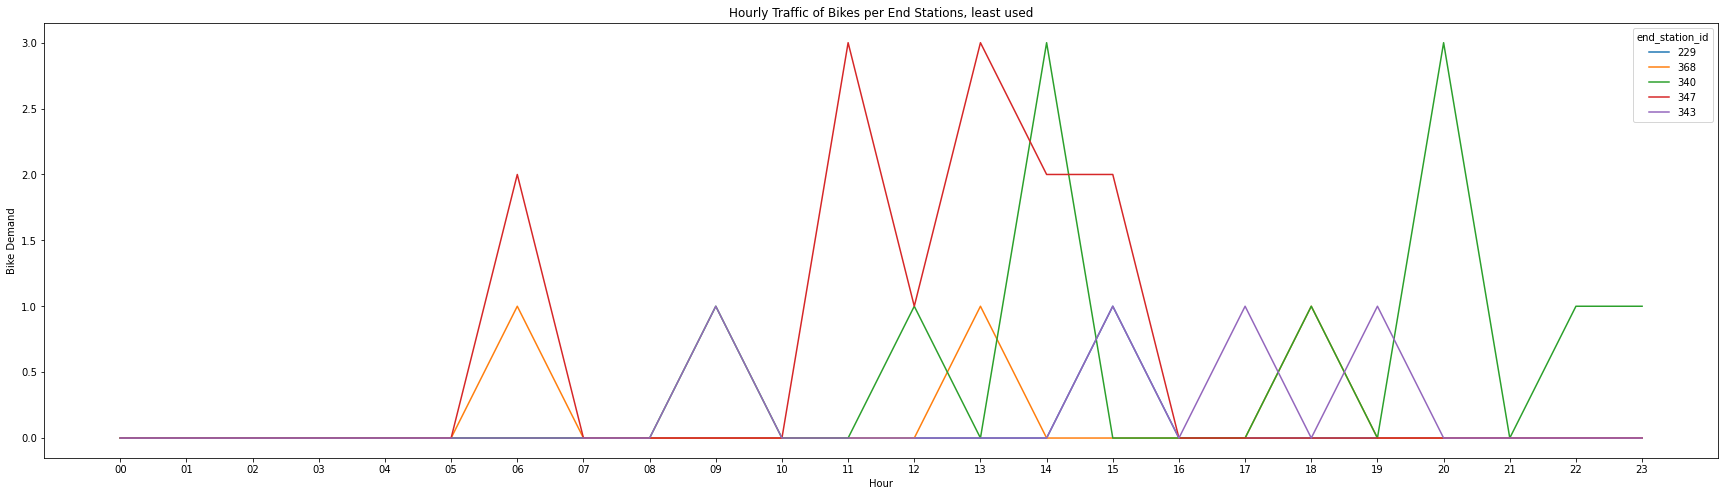

In [122]:
# settings for plotting
figure, ax = plt.subplots(figsize=(30, 8))
ax.set(title='Hourly Traffic of Bikes per End Stations, least used')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')

end_ids_least = []
# least used end stations
for i in range(5):
    station_id = end_station_occurrences.sort_values(ascending=True).index[i]
    end_ids_least.append(station_id)
    sns.lineplot(data=df_traffic_start[str(station_id)])


plt.legend(title= 'end_station_id', labels=end_ids_least)
plt.savefig('./figures/hourly_traffic_per_stations_end_least.png')

Lastly, we can also look the traffic per station, but with taking both start and end stations into consideration.

In [123]:
station_occurrences.head(5)

67     103330
80      87808
68      74496
22      69847
190     66271
dtype: int64

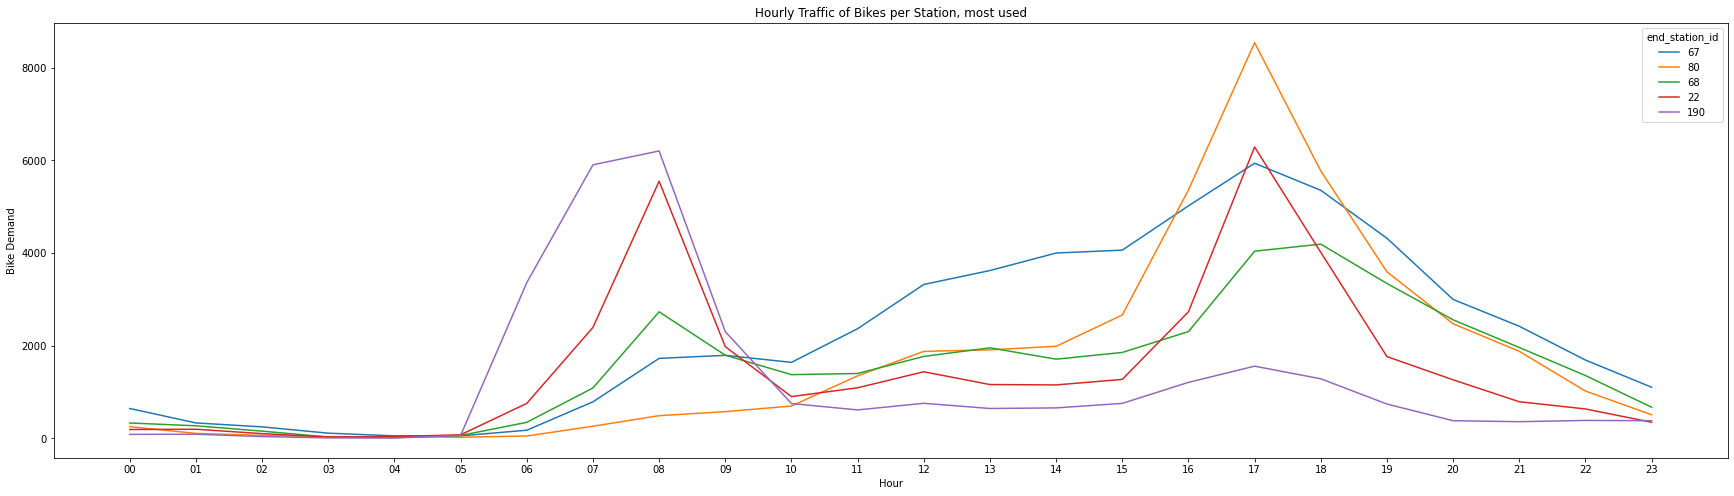

In [124]:
# settings for plotting
figure, ax = plt.subplots(figsize=(30, 8))
ax.set(title = 'Hourly Traffic of Bikes per Station, most used')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')

ids_most = []
# least used end stations
for i in range(5):
    station_id = station_occurrences.sort_values(ascending = False).index[i]
    ids_most.append(station_id)
    sns.lineplot(data = df_traffic_start[str(station_id)])


plt.legend(title = 'end_station_id', labels = ids_most)
plt.savefig('./figures/hourly_traffic_per_stations_both_most.png')

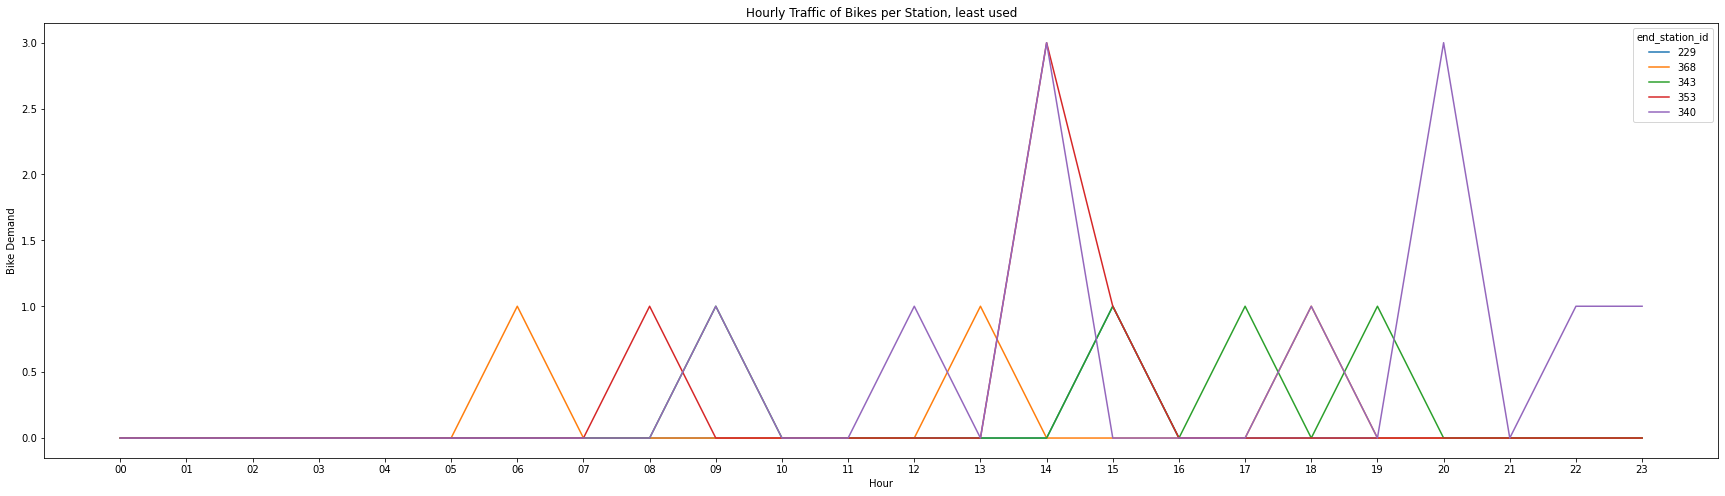

In [125]:
# settings for plotting
figure, ax = plt.subplots(figsize = (30, 8))
ax.set(title = 'Hourly Traffic of Bikes per Station, least used')
ax.set_ylabel('Bike Demand')
ax.set_xlabel('Hour')

ids_least = []
# least used end stations
for i in range(5):
    station_id = station_occurrences.sort_values(ascending = True).index[i]
    ids_least.append(station_id)
    sns.lineplot(data = df_traffic_start[str(station_id)])


plt.legend(title = 'end_station_id', labels = ids_least)
plt.savefig('./figures/hourly_traffic_per_stations_both_least.png')

# Predictive Analytics

In this chapter, we will do our predictive analytics to predict bike rental demand. We do this to facilitate decison support for managers. We will predict the demand in the next hour and use three models (Linear Regression, XGBoost, Decision Trees). Furthermore, we will evaluate the model performance by using different evaluation metrics (R2, Mean Absolute Error, Maximum Error, RMSE and Explained Variance).

## Imports for Predictive Analytics

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn import metrics
from xgboost import XGBRegressor
import graphviz

## Methods

In this section, we will define a few functions that we use during our predictive analytics.

In [127]:
def get_dummies(df, columns):
    """
    Creates a dataframe that has all the dummy variables for our categorical columns.
    ...
    
    Arguments
    ---------
    df                      : pandas.DataFrame
                            dataframe from which the dummy columns should be created from
    columns                 : list
                            list of column names that should be used for dummy creation
    Returns
    -------
    pandas.DataFrame with dummy variables
    """
    for column in columns:
        # concat df and the dummy columns
        # use drop_first to reduce number of columns
        df = pd.concat([df, pd.get_dummies(df[column], drop_first = True, prefix = column)], axis = 1)
        # remove original column, because we already have our dummy columns
        df.drop([column], inplace = True, axis = 1)
    # return our dataframe having dummy variables
    return df

In [128]:
def visualize_prediction_difference(prediction, true_values, log):
    """
    Prints our forecast and the true values to console to see the differences.
    ...
    
    Arguments
    ---------
    prediction              : numpy.ndarray
                            array with predictions from our model training
    true_values             : pandas.core.series.Series
                            true values for corresponding y_train data
    log                     : boolean
                            if true the exponential function needs to be applied to the true_values
    """
    for value in range(len(prediction)):
        if log:
            print(np.exp(true_values.values[value]), "/", np.exp(prediction[value]))
        else:
            print(true_values.values[value], "/", prediction[value])        

In [129]:
# stores all the performance measure per model
performance = {}

def train_and_evaluate_model(name, model, x, y, get_model = True, visualize_prediction_diff = False, log=False):
    """
    Trains and evaluates given models.
    ...
    
    Arguments
    ---------
    name                      : string
                              name of the algorithm/model
    model                     : model instance
                              instance of a predictive model
    x                         : columns of dataframe
                              covariates or features
    y                         : column of dataframe
                              target column or feature
    get_model                 : boolean
                              if true it will return the trained model
    visualize_prediction_diff : boolean
                              if true it will use the visualize_prediction_difference function to print diff to console
    log                       : boolean
                              needed for visualize_prediction_difference function to print correct differences
    Returns
    -------
    Returns the trained model if get_model is true. 
    """
    # split our data into train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, random_state = 42)
    
    # fit our model
    model.fit(x_train, y_train)
    # predict
    prediction = model.predict(x_test)
    
    # if log we need to use the exp function to present correct error metrices
    if log:
        prediction = np.exp(prediction)
        y_test = np.exp(y_test)
    
    # calculate error metrices
    R2 = metrics.r2_score(y_test, prediction) * 100
    performance['R2-Score'] = str(R2) + '%'
    
    MAE = metrics.mean_absolute_error(y_test, prediction)
    performance['MAE'] = MAE
    
    max_error = metrics.max_error(y_test, prediction)
    performance['max. error'] = max_error
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediction))
    performance['RMSE'] = RMSE
    
    # printing performance to console
    print('Model Name: ', name)
    for key, value in performance.items():
        print(key, ': ', value)
    # if true, visualize the differences between prediction and real values
    if visualize_prediction_diff:
        visualize_prediction_difference(prediction, y_test, log)
    # if true return the trained model
    if get_model:
        return model

In [130]:
def visualize_regression_line_decisiontree(tree_depth, x, y):
    """
    Plots the regression line for the decision tree regressor and the decision tree for a any defined tree depth.
    ...
    Arguments
    ---------
    tree_depth                : int
                              number depth of the tree
    x                         : columns
                              columns with independent features to train decision tree
    y                         : colum
                              column with target variable
    """
    # fit regression model (to full data)
    tree_reg = DecisionTreeRegressor(max_depth = tree_depth,
                                    criterion = "mae") # Other options: "mse", "friedman_mse", "mae"
    tree_reg.fit(x.reshape((-1,1)), y)
    Y_pred = tree_reg.predict(x.reshape((-1,1)))

    # plot
    plt.figure(figsize = (7,5))
    plt.scatter(x, y, marker = "x")
    plt.plot(np.arange(-18,40,1), tree_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker = "x", color = 'C1')
    plt.xlabel("High Temperature (°C)", fontsize = 14)
    plt.ylabel("Peak Demand", fontsize = 14)
    plt.savefig('./figures/avg_temp_bike_demand_prediction_decisiontree.png')

In [131]:
def visualize_decisiontree(tree_depth, x, y):
    """
    Visualizes a decision tree with graphviz.
    ...
    Arguments
    ---------
    tree_depth                : int
                              number depth of the tree
    x                         : columns
                              columns with independent features to train decision tree
    y                         : colum
                              column with target variable
    Returns
    -------
    Returns the graph   
    """
    # Fit regression model (to full data)
    model = DecisionTreeRegressor(max_depth = tree_depth)
    model.fit(x.reshape((-1,1)), y) 
    
    dot_data = export_graphviz(model,
                              feature_names = ['avg_temp'])
    graph = graphviz.Source(dot_data) 
    
    return graph

In [132]:
def visualize_linear_regression(x, y, model):
    """
    Visualizes a linear regression with only one input feature.
    ...
    
    Arguments
    ---------
    x                         : numpy.ndarray
                              independent variable 
    y                         : pandas.core.series.Series
                              dependent variable
    model                     : model instance
                              instance of a trained predictive model
    """
    # visualize 
    plt.scatter(x, y, marker = 'x', c = 'g')
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    linspace = np.linspace(xlim[0], xlim[1]) # returns evenly spaced numbers between -50 and 50
    equation = model.intercept_ + model.coef_ * linspace

    plt.plot(linspace, equation)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Average Temperature (°C)")
    plt.ylabel("Bike Demand")
    plt.show()
    plt.savefig('./figures/avg_temp_bike_demand_prediction.png')

## Preparations

In [133]:
df_analytics.head(2)

date_time  max_temp  min_temp precip       date hour weekday  \
0 2018-01-01 00:00:00     -12.8     -12.8    0.0 2018-01-01   00  Monday   
1 2018-01-01 01:00:00     -13.3     -13.3    0.0 2018-01-01   01  Monday   

     month  season is_holiday is_workingday is_weekend  avg_temp  count  \
0  January  Winter        Yes            No         No     -12.8    4.0   
1  January  Winter        Yes            No         No     -13.3    6.0   

   unique_bike_ids  
0              4.0  
1              6.0

In [134]:
df_analytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_time        8760 non-null   datetime64[ns]
 1   max_temp         8760 non-null   float64       
 2   min_temp         8760 non-null   float64       
 3   precip           8760 non-null   category      
 4   date             8760 non-null   datetime64[ns]
 5   hour             8760 non-null   category      
 6   weekday          8760 non-null   category      
 7   month            8760 non-null   category      
 8   season           8760 non-null   category      
 9   is_holiday       8760 non-null   category      
 10  is_workingday    8760 non-null   category      
 11  is_weekend       8760 non-null   category      
 12  avg_temp         8760 non-null   float64       
 13  count            8760 non-null   float64       
 14  unique_bike_ids  8760 non-null   float64

At first, we remove the columns that we do not need for our analysis.

In [135]:
# remove not needed columns for analysis
df_analytics_final = df_analytics.copy()
df_analytics_final.drop(columns = ['unique_bike_ids', 'date_time', 'date'], inplace = True)

In [136]:
df_analytics_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   max_temp       8760 non-null   float64 
 1   min_temp       8760 non-null   float64 
 2   precip         8760 non-null   category
 3   hour           8760 non-null   category
 4   weekday        8760 non-null   category
 5   month          8760 non-null   category
 6   season         8760 non-null   category
 7   is_holiday     8760 non-null   category
 8   is_workingday  8760 non-null   category
 9   is_weekend     8760 non-null   category
 10  avg_temp       8760 non-null   float64 
 11  count          8760 non-null   float64 
dtypes: category(8), float64(4)
memory usage: 670.8 KB


Now, we will map our features to numerical values, because most machine learning algorithms require input and output variables to be numeric. 

In [137]:
df_analytics_final['weekday'] = df_analytics_final['weekday'].map({
    'Monday': 0, 
    'Tuesday': 1, 
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
})

In [138]:
df_analytics_final['is_holiday'] = df_analytics_final['is_holiday'].map({
    'No': 0, 
    'Yes': 1
})

In [139]:
df_analytics_final['is_workingday'] = df_analytics_final['is_workingday'].map({
    'No': 0,
    'Yes': 1
})

In [140]:
df_analytics_final['is_weekend'] = df_analytics_final['is_weekend'].map({
    'No': 0,
    'Yes': 1
})

In [141]:
df_analytics_final['month'] = df_analytics_final['month'].map({
    'January': 0, 
    'February': 1, 
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
})

In [142]:
df_analytics_final['season'] = df_analytics_final['season'].map({
    'Winter': 0, 
    'Spring': 1, 
    'Summer': 2,
    'Fall': 3
})

In [143]:
df_analytics_final.head(2)

max_temp  min_temp precip hour weekday month season is_holiday  \
0     -12.8     -12.8    0.0   00       0     0      0          1   
1     -13.3     -13.3    0.0   01       0     0      0          1   

  is_workingday is_weekend  avg_temp  count  
0             0          0     -12.8    4.0  
1             0          0     -13.3    6.0

In [144]:
df_analytics_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   max_temp       8760 non-null   float64 
 1   min_temp       8760 non-null   float64 
 2   precip         8760 non-null   category
 3   hour           8760 non-null   category
 4   weekday        8760 non-null   category
 5   month          8760 non-null   category
 6   season         8760 non-null   category
 7   is_holiday     8760 non-null   category
 8   is_workingday  8760 non-null   category
 9   is_weekend     8760 non-null   category
 10  avg_temp       8760 non-null   float64 
 11  count          8760 non-null   float64 
dtypes: category(8), float64(4)
memory usage: 670.8 KB


Since we have three columns representing the temperature we will use a correlation matrix to check whether they are correlated. We assume a high correlation, but let's check.

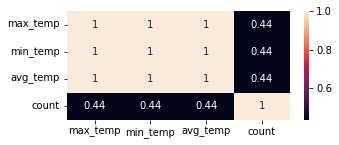

In [145]:
corr = df_analytics_final.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr, annot=True)
plt.savefig('./figures/correlation_matrix_temperature.png')

We see that all three of the columns are highly correlated (0.44). Therefore, we remove two of the columns and just keep the average temperature.

In [146]:
df_analytics_final.drop(['max_temp', 'min_temp'], axis = 1, inplace = True)

In [147]:
df_analytics_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   precip         8760 non-null   category
 1   hour           8760 non-null   category
 2   weekday        8760 non-null   category
 3   month          8760 non-null   category
 4   season         8760 non-null   category
 5   is_holiday     8760 non-null   category
 6   is_workingday  8760 non-null   category
 7   is_weekend     8760 non-null   category
 8   avg_temp       8760 non-null   float64 
 9   count          8760 non-null   float64 
dtypes: category(8), float64(2)
memory usage: 533.9 KB


Finally, our dataframe looks pretty good. We have removed all unnecessary columns, encoded our features and set the correct datatype. We are good to go to train our models and predict the bike demand.

## Linear Regression

### Linear Regression with one Feature

First, we start with our linear regression with only one input feature. Since the temperature has a "high" correlation (around ~0.44) with our bike rental demand, we choose this value as our feature.

In [148]:
x_one_feature = df_analytics_final['avg_temp'].values.reshape(-1, 1)
y_one_feature = df_analytics_final['count']

one_feature_model = LinearRegression(fit_intercept = True)

trained_one_feature_model = train_and_evaluate_model('Linear Regression with one feature', one_feature_model, x_one_feature, y_one_feature)

Model Name:  Linear Regression with one feature
R2-Score :  18.686335338093805%
MAE :  150.2984590224051
max. error :  926.1085467345553
RMSE :  202.04751489799548


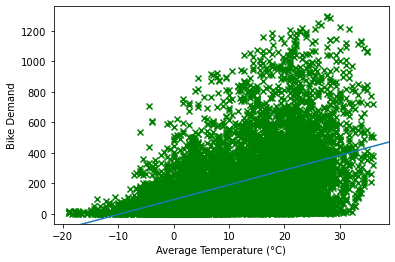

<Figure size 432x288 with 0 Axes>

In [149]:
visualize_linear_regression(x_one_feature, y_one_feature, trained_one_feature_model)

We see that the performance is not very good. Therefore, we try with two input features.

### Linear Regression with two Features

In [150]:
X_two_features = df_analytics_final[['avg_temp', 'is_workingday']]
y_two_features = df_analytics_final['count']

two_feature_model = LinearRegression(fit_intercept = True)

train_and_evaluate_model('Linear Regression with two features', two_feature_model, X_two_features, y_two_features, get_model = False)


Model Name:  Linear Regression with two features
R2-Score :  19.85094909331253%
MAE :  149.7616230387016
max. error :  908.9482606630595
RMSE :  200.59538535335548


Since the performance is still very low, we try a prediction with all available features.

### Linear Regression with all Features

In [151]:
df_analytics_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   precip         8760 non-null   category
 1   hour           8760 non-null   category
 2   weekday        8760 non-null   category
 3   month          8760 non-null   category
 4   season         8760 non-null   category
 5   is_holiday     8760 non-null   category
 6   is_workingday  8760 non-null   category
 7   is_weekend     8760 non-null   category
 8   avg_temp       8760 non-null   float64 
 9   count          8760 non-null   float64 
dtypes: category(8), float64(2)
memory usage: 533.9 KB


In [152]:
# get dummy columns for categorical values
columns = ['hour', 'weekday', 'month', 'season']
df_dummies = get_dummies(df_analytics_final.copy(), columns)

X_all_features = df_dummies.drop(['count'], axis = 1)
y_all_features = df_dummies['count']

linear_regression_all_features = LinearRegression(fit_intercept = False)
train_and_evaluate_model('Linear Regression with all features', linear_regression_all_features, X_all_features, y_all_features, get_model=False)

Model Name:  Linear Regression with all features
R2-Score :  66.18957625926329%
MAE :  95.57450847483368
max. error :  603.4441528320312
RMSE :  130.28579064404255


We see that the performance is okay. We get a mean absolute error from ~95 and our R2 ist around 66%.

### Linear Regression with all Features and Log of Target Variable

We did some research on the internet on how to boost our R2 score. We found out that often, the dependent variable is not normally distributed. Therefore, we take a look at our dependent variable.

<AxesSubplot:xlabel='count', ylabel='Density'>

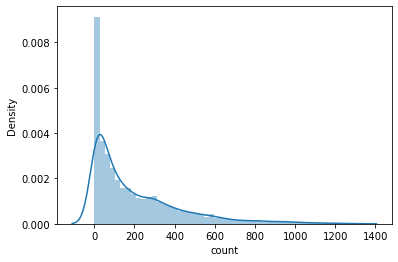

In [153]:
sns.distplot(df_analytics_final["count"])

We can see that our target variable is not normally distributed. Therefore, we try and take the log of our target variable, train the algorithm and see if we can increase our prediction model.

In [154]:
columns = ['hour', 'weekday', 'month', 'season']
df_analytics_log = df_analytics_final.copy()
df_analytics_log.reset_index()

df_dummies = get_dummies(df_analytics_log.copy(), columns)

X_all_features_log = df_dummies.drop(['count'], axis = 1)
y_all_features_temp = df_analytics_log['count']
y_all_features_log = np.log1p(y_all_features_temp)

linear_regression_all_features_log = LinearRegression(fit_intercept = False)
train_and_evaluate_model('Linear Regression with all features', linear_regression_all_features_log, X_all_features_log, y_all_features_log, get_model = False, log = True)

Model Name:  Linear Regression with all features
R2-Score :  74.6476465413173%
MAE :  68.27574255272728
max. error :  887.7367369008509
RMSE :  112.81864686052855


Indeed, this resulted in a better model performance

## XGBoost

In this section, we use the XGBoost Regressor to predict our bike rental demand.

In [155]:
df_analytics_xgboost = df_analytics_final.copy()
columns = ['hour', 'weekday', 'month', 'season', 'is_holiday', 'is_workingday', 'precip', 'is_weekend']
set_datatype('float', columns, df_analytics_xgboost)

In [156]:
df_analytics_xgboost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precip         8760 non-null   float64
 1   hour           8760 non-null   float64
 2   weekday        8760 non-null   float64
 3   month          8760 non-null   float64
 4   season         8760 non-null   float64
 5   is_holiday     8760 non-null   float64
 6   is_workingday  8760 non-null   float64
 7   is_weekend     8760 non-null   float64
 8   avg_temp       8760 non-null   float64
 9   count          8760 non-null   float64
dtypes: float64(10)
memory usage: 1010.9 KB


In [157]:
# get our x and y values
x_xgb = df_analytics_xgboost.drop(['count'], axis = 1)
y_xgb = df_analytics_xgboost['count']

# create model, 46 estimators worked well in our case
xgb = XGBRegressor(n_estimators = 46)

# train model and evaluate performance
train_and_evaluate_model("Xtreme Gradient", xgb, x_xgb, y_xgb, get_model = False)

Model Name:  Xtreme Gradient
R2-Score :  89.87175007698343%
MAE :  39.77458750188487
max. error :  961.673828125
RMSE :  71.30811409021273


We see that the performance is pretty good. We get a mean absolute error of around ~40.

## Decision Tree

In the following, we look at the performance of Decision Trees for several tree depths. It becomes obvious that after a tree depth of 20, the performance does not improve significantly. Hence, in order to avoid overfitting it can be stated that reasonable tree depths lie in between of 10 and 20.

In [158]:
columns = ['hour', 'weekday', 'month', 'season']
df_dummies = get_dummies(df_analytics_final.copy(), columns)

X_decision_all = df_dummies.drop(['count'], axis = 1)
y_decision_all = df_dummies['count']

df_analytics_decisiontrees = df_analytics_final.copy()
df_analytics_decisiontrees = DecisionTreeRegressor(max_depth = 5)

train_and_evaluate_model('Decision Trees', df_analytics_decisiontrees, X_decision_all, y_decision_all)

Model Name:  Decision Trees
R2-Score :  55.53537216299409%
MAE :  115.42207299037138
max. error :  942.0285714285715
RMSE :  149.4097973895551


DecisionTreeRegressor(max_depth=5)

In [159]:
df_analytics_decisiontrees = df_analytics_final.copy()
df_analytics_decisiontrees = DecisionTreeRegressor(max_depth = 10)
train_and_evaluate_model('Decision Trees', df_analytics_decisiontrees, X_decision_all, y_decision_all)

Model Name:  Decision Trees
R2-Score :  67.0200687421715%
MAE :  87.2474033402021
max. error :  891.0
RMSE :  128.67572355801988


DecisionTreeRegressor(max_depth=10)

In [160]:
df_analytics_decisiontrees = df_analytics_final.copy()
df_analytics_decisiontrees = DecisionTreeRegressor(max_depth = 20)
train_and_evaluate_model('Decision Trees', df_analytics_decisiontrees, X_decision_all, y_decision_all)

Model Name:  Decision Trees
R2-Score :  74.97493501681372%
MAE :  66.44295235819597
max. error :  981.0
RMSE :  112.08806009904218


DecisionTreeRegressor(max_depth=20)

In [161]:
df_analytics_decisiontrees = df_analytics_final.copy()
df_analytics_decisiontrees = DecisionTreeRegressor()
train_and_evaluate_model('Decision Trees', df_analytics_decisiontrees, X_decision_all, y_decision_all)

Model Name:  Decision Trees
R2-Score :  74.91003823794956%
MAE :  63.57671232876712
max. error :  981.0
RMSE :  112.2333033620665


DecisionTreeRegressor()

Now, similar to the linear regression with one input feature above, we display the regression line of the decision tree for the average temperature. We exemplary choose a tree depth of 10.

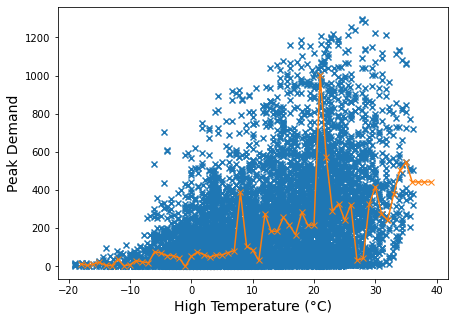

In [162]:
Xp = df_analytics_final["avg_temp"].values
Yp = df_analytics_final["count"].values
visualize_regression_line_decisiontree(10, Xp, Yp)

Finally, for the example above, we visualize the whole decision tree.

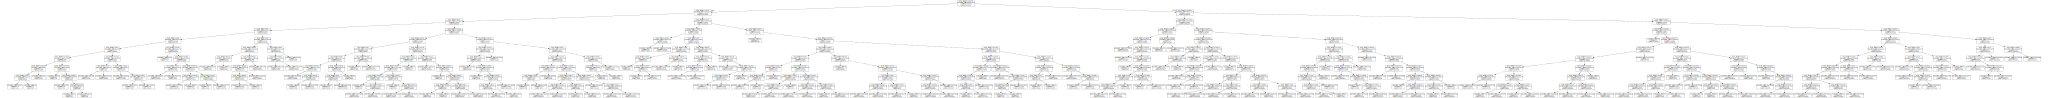

In [163]:
visualize_decisiontree(10, Xp, y_decision_all)

# Clustering

In this chapter, we will cluster our data to identify trip types and customer types. Furthermore, the locations are clustered based on their demand patterns.

## Imports for Clustering

In [164]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Methods

In [165]:
def loss_function(data):
    """
    Creates losses and clusters for the data and plots it. Note: It scales the data!
    ...
    
    Arguments
    ---------
    data                    : pandas.DataFrame
                            dataframe used for clustering
    """
    # scale data
    scaler = StandardScaler()
    scaler.fit(data)
    data_scaled = scaler.transform(data)

    # create clusters and losses
    clusters = []
    losses = []
    # create clusters for different k's
    for k in range(1, 10):
        model = KMeans(n_clusters = k + 1)
        model.fit(data_scaled)
        clusters.append(k + 1)
        losses.append(model.inertia_)
    
    # plot loss function
    plt.figure(figsize=(10, 5))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Loss')
    plt.title('Loss Function')
    plt.plot(clusters, losses)
    plt.savefig('./figures/loss_function_clustering.png')

In [166]:
def loss_function_without_scaling(df):
    """
    Creates losses and clusters for the data and plots it. Note: It does not scale the data!
    ...

    Arguments
    ---------
    df.                     : pandas.DataFrame
                            dataframe used for clustering
    """
    # create clusters and losses
    clusters = []
    losses = []
    # trying different k's
    for k in range(1, 10):
        model = KMeans(n_clusters=k+1)
        model.fit(df)
        clusters.append(k+1)
        losses.append(model.inertia_)

    # plot loss function
    plt.figure(figsize=(10,5))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Loss')
    plt.title('Loss Function')
    plt.plot(clusters, losses)
    plt.savefig('./figures/loss_function_clustering_location.png')

In [167]:
# function for clustering and plotting
def cluster_tripduration(data, amount_clusters):
    """
    Creates clusters for the tripduration and plots it.
    ...
    
    Arguments
    ---------
    data                    : pandas.DataFrame
                            data for clustering
                            
    amount_cluster          : int
                            amount of clusters
    """
    # scale data
    scaler = StandardScaler()
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    
    # cluster data
    k_means = KMeans(n_clusters = amount_clusters)
    k_means.fit(data_scaled)
    df_cluster_result = data.copy()
    df_cluster_result['cluster'] = k_means.predict(data_scaled)
    
    # plot data and clusters
    plt.figure(figsize=(20, 10))
    plt.xlabel('Tripduration')
    plt.ylabel('Hour')
    plt.title('Clustering Result')
    for k in range(0, amount_clusters):
        df_number_of_cluster = df_cluster_result[df_cluster_result['cluster'] == k]
        plt.scatter(df_number_of_cluster['duration'], df_number_of_cluster['hour'])
    fig_trip = plt.gcf()
    plt.show()
    figure_name_tripduration = 'tripduration_clustering_' + str(amount_clusters) + '.png'
    fig_trip.savefig('./figures/' + figure_name_tripduration)

A help function for changing "Subscriber" and "Customer" to int values.

In [168]:
def select_user_type(user_type):
    """
    Encodes user-type into numerical values
    ...
    
    Arguments
    ---------
    user_type               : string
                            user_type
    Returns
    -------
    Returns 0 if Subscriber else 1 (Customer)   
    """
    if (user_type == 'Subscriber'):
        return 0
    else:
        return 1

In [169]:
# function for clustering and plotting
def cluster_user_type(data, amount_clusters):
    """
    Creates losses and clusters for the data and plots it.
    ...
    
    Arguments
    ---------
    data                    : pandas.DataFrame
                            data for clustering
                            
    amount_cluster          : int
                            amount of clusters
    """
    # scale data
    scaler = StandardScaler()
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    
    # cluster data
    k_means = KMeans(n_clusters = amount_clusters)
    k_means.fit(data_scaled)
    df_cluster_result = data.copy()
    df_cluster_result['cluster'] = k_means.predict(data_scaled)
    
    # plot data and clusters
    plt.figure(figsize=(20,10))
    plt.xlabel('User Type')
    plt.ylabel('Hour')
    plt.title('Clustering Result')
    for k in range(0, amount_clusters):
        df_number_of_cluster = df_cluster_result[df_cluster_result['cluster'] == k]
        plt.scatter(df_number_of_cluster['user_type'], df_number_of_cluster['hour'])
    fig_user_type = plt.gcf()
    plt.show()
    figure_name_user_type = 'user_type_clustering_' + str(amount_clusters) + '.png'
    fig_user_type.savefig('./figures/' + figure_name_user_type)

In [170]:
def location_clustering(df, k):
    """
    Clusters given locations into k clusters. 
    ...
    
    Arguments
    ---------
    df                      : pandas.DataFrame
                            dataframe for clustering
    k                       : int
                            number of clusters
    Returns
    -------
    Call of function to visualize the clustering with results of k-means clustering with geopandas.
    
    """    
    # get the needed columns for clustering.
    df_location_demand = df.filter(['Latitude', 'Longitude', 'normalized_occurrence'])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_location_demand)
    kmeans.predict(df_location_demand)
    # get labels for all datapoints
    labels = kmeans.labels_
    # get color palette with k colours to visualize
    palette = sns.color_palette("Set1", k)
    # visualize with matplotlib
    visualize_location_clustering_matplotlib(df_location_demand, k, labels, palette)
    # return map to visualize with geopandas
    return visualize_location_clustering_geopandas(df_location_demand, k, labels, palette)  

In [171]:
def visualize_location_clustering_geopandas(df, k, labels, color_palette):
    """
    Visualizes location clustering with geopandas and ipyleaflet.
    ...
    
    Arguments
    ---------
    df                      : pandas.DataFrame
                            dataframe that was used for clustering
    k                       : int
                            number of clusters
    labels                  : list
                            list of labels that indicate the cluster assignment
    color_palette           : seaborn.palettes._ColorPalette
                            seaborn color palette with k colors for visualizations
    Returns
    -------
    ipyleaflet map instance
    
    """   
    # create map from boston that is roughly centered 
    boston_cluster_map = Map(
        center = (df['Latitude'].mean(), df['Longitude'].mean()),
        zoom = 11)

    # list to store all of our markers
    marker_list = []

    df.reset_index(inplace=True)
    # adding one marker per station
    for index, item in df.iterrows():
        marker = CircleMarker(location = (item['Latitude'], item['Longitude']), radius = 2)
        # use color for specific label
        marker.color = color_palette.as_hex()[labels[index]]
        marker_list.append(marker)

    # create marker cluster
    # we disable the clustering at zoom, because otherwise multiple stations would be clustered together
    cluster = MarkerCluster(
        markers = marker_list,
        disable_clustering_at_zoom = 1
    )

    # adding marker layer to map
    boston_cluster_map.add_layer(cluster);
    return boston_cluster_map

In [172]:
def visualize_location_clustering_matplotlib(df, k, labels, color_palette):
    """
    Visualizes location clustering with matplotlib on shapefile.
    ...
    
    Arguments
    ---------
    df                      : pandas.DataFrame
                            dataframe that was used for clustering
    k                       : int
                            number of clusters
    labels                  : list
                            list of labels that indicate the cluster assignment
    color_palette           : seaborn.palettes._ColorPalette
                            seaborn color palette with k colors for visualizations
    """
    # read data about Boston from file
    boston_location_clustering = geopandas.read_file('./data/Shapefiles/City_of_Boston_Boundary/City_of_Boston_Boundary.shp')
    crs = 'EPSG:4326'
    geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
    
    # default color is black
    df['color'] = '#000000'

    df.reset_index(inplace=True)
    for index, item in df.iterrows():
        # set color for each entry by label
        df['color'].iloc[index] = str(color_palette.as_hex()[labels[index]])

    # create geo dataframe 
    geo_df = geopandas.GeoDataFrame(df, crs = crs, geometry = geometry)

    # plot the data
    fig, ax = plt.subplots(figsize = (10, 10))
    boston.to_crs(epsg = 4326).plot(ax = ax, color = 'lightgrey')
    geo_df.plot(ax = ax, color = df['color'])
    ax.set_title('Location Clustering of Bike Rentals based on Demand Patterns')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    figure_name_location = 'location_clustering_' + str(k) + '.png'
    plt.savefig('./figures/' + figure_name_location)
    

## Clustering for Trip- and User-Types

We prepare a dataframe for the clustering of the tripduration and hour. This is done by converting duration which is in second to minutes by dividing by 60 and rounding the result. We also do not include any trip that is longer than 60 minutes. We can include them in their own cluster. For example a cluster for very long trips.

In [173]:
# create df for clustering, transform tripduration from seconds to minutes and remove every trip that is longer than 60 minutes
df_cluster = df_original.copy()
df_cluster['duration'] = df_cluster['duration'].apply(lambda x: round(x / 60))
df_cluster = df_cluster[df_cluster['duration'] <= 60]
df_cluster['hour'] = df_cluster['hour'].astype('int')

# create df for tripduration clustering
df_cluster_tripduration = df_cluster[['duration', 'hour']].copy()
df_cluster_tripduration.head()

duration  hour
0         6     0
1         4     0
2        19     0
3        14     0
4         8     1

Here you can see the loss function for the clusters of tripduration. The elbow is at 3 to 6 so the optimal number of clusters is between those two numbers.

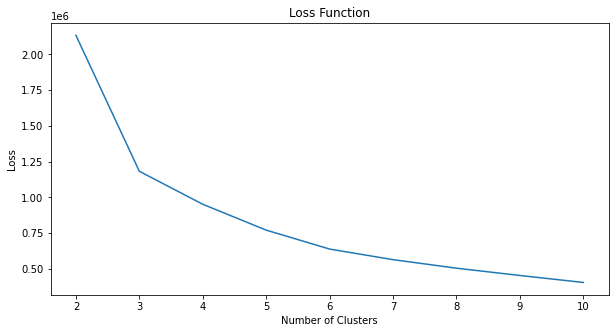

In [174]:
loss_function(df_cluster_tripduration)

In the following we are going to visualize the clustering of the tripduration for 3, 4, 5 and 6 clusters.

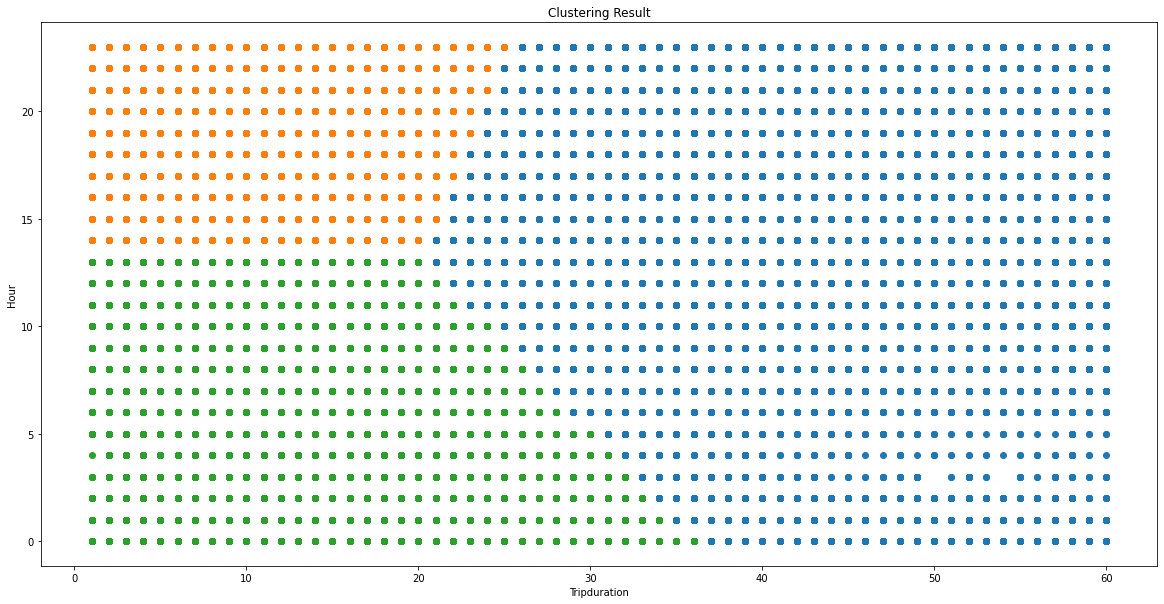

In [175]:
cluster_tripduration(df_cluster_tripduration, 3)

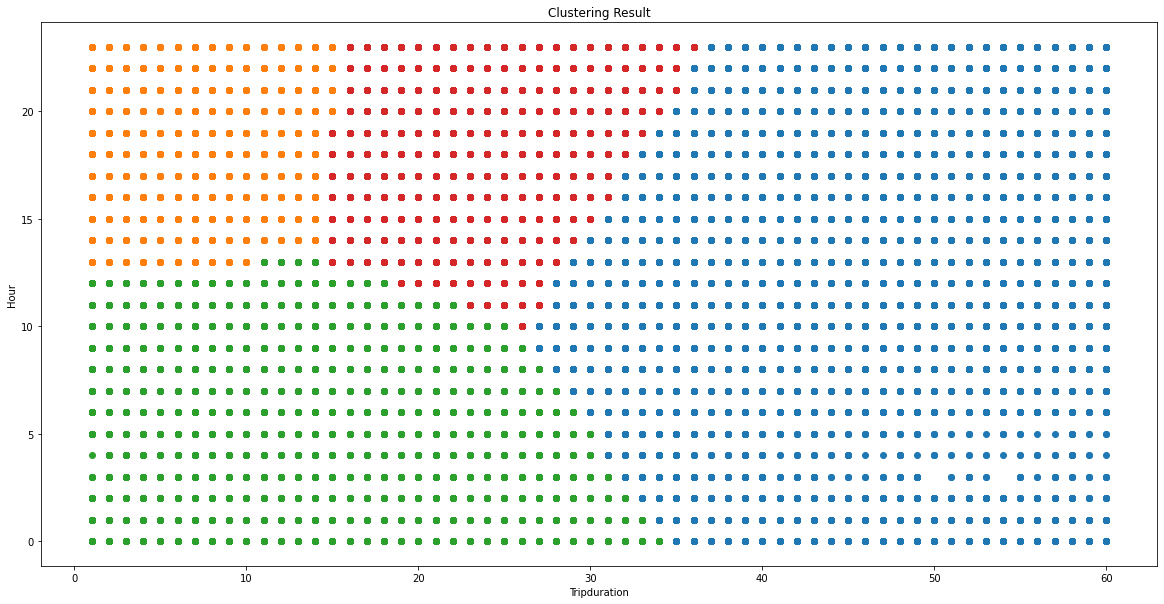

In [176]:
cluster_tripduration(df_cluster_tripduration, 4)

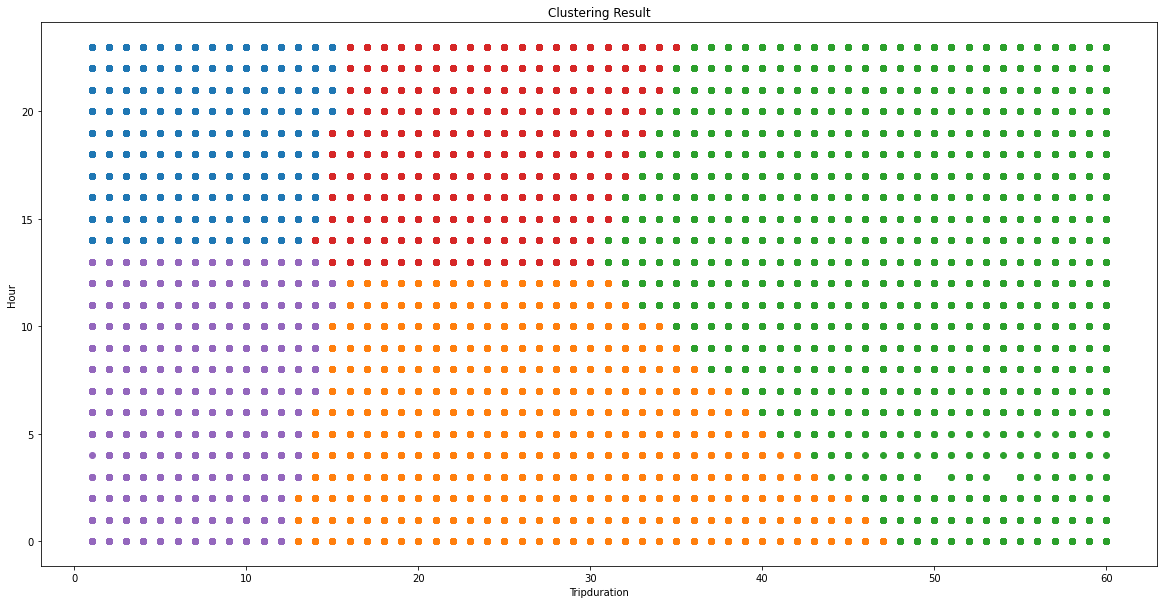

In [177]:
cluster_tripduration(df_cluster_tripduration, 5)

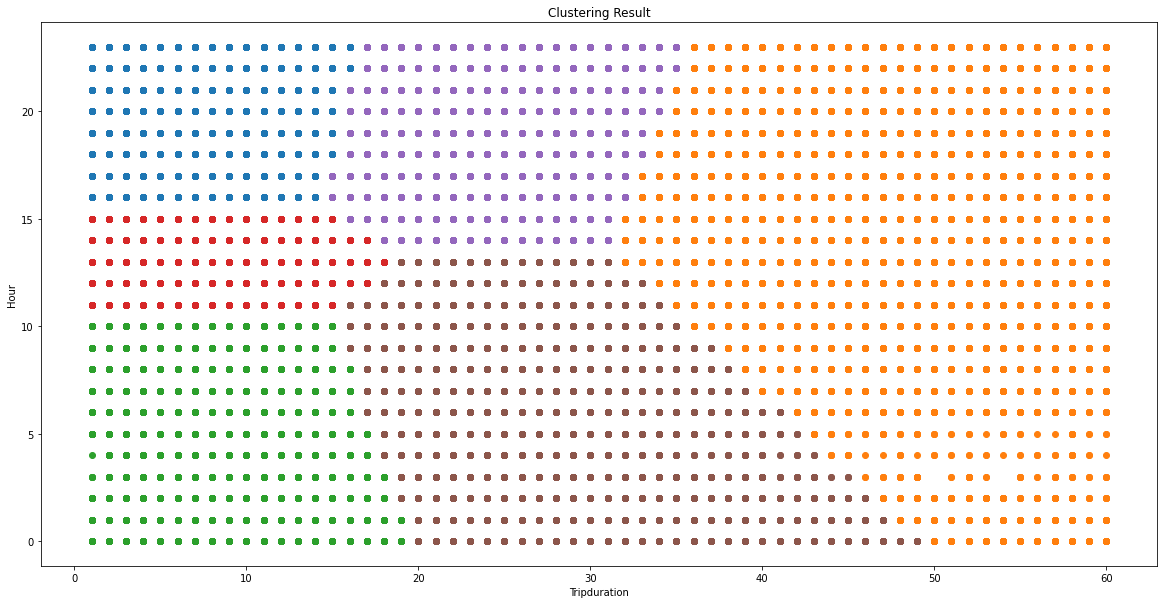

In [178]:
cluster_tripduration(df_cluster_tripduration, 6)

We prepare a dataframe for the clustering of the user types and hour. We use the help function defined above to convert the customer type which is a String to an int.

In [179]:
 # create df for user_type clustering
df_cluster_user_type = df_cluster[['user_type', 'hour']].copy()
df_cluster_user_type['user_type'] = df_cluster_user_type['user_type'].apply(lambda x: select_user_type(x))
df_cluster_user_type.head()

user_type  hour
0         0     0
1         0     0
2         0     0
3         0     0
4         0     1

Below, you can see the loss function for the clusters of user types. The elbow is at 3 to 6 so the optimal number of clusters is between those two numbers.

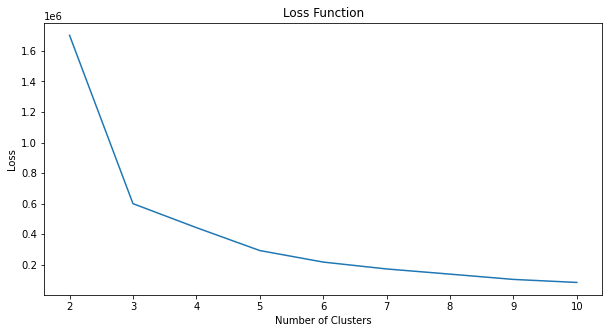

In [180]:
loss_function(df_cluster_user_type)

In the following, we are going to visualize the clustering of the user types for 3, 4, 5 and 6 clusters.

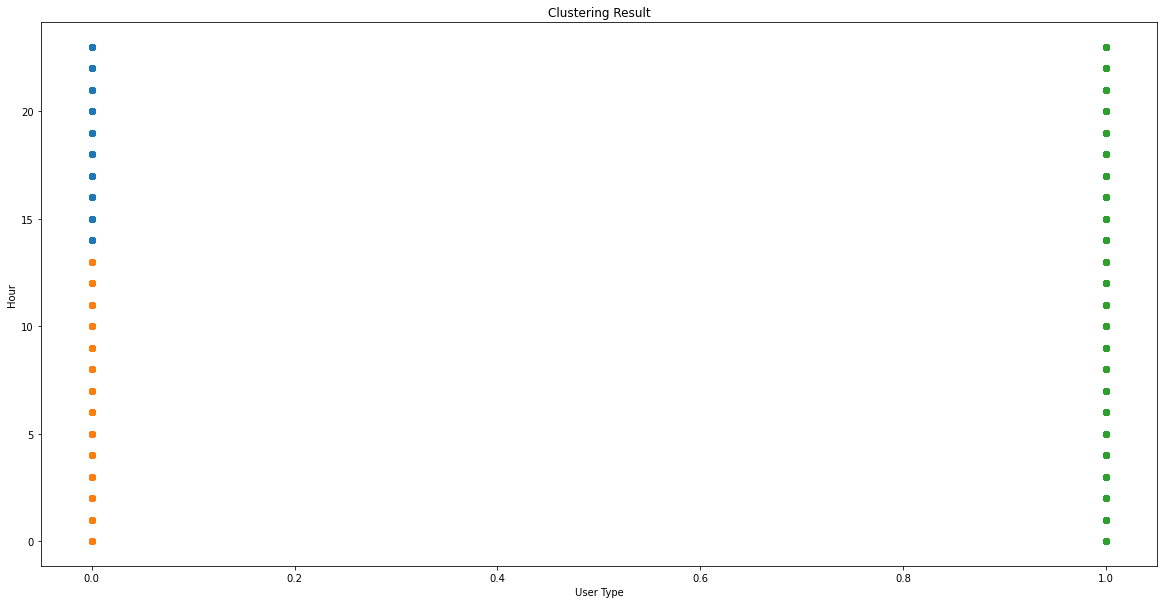

In [181]:
cluster_user_type(df_cluster_user_type, 3)

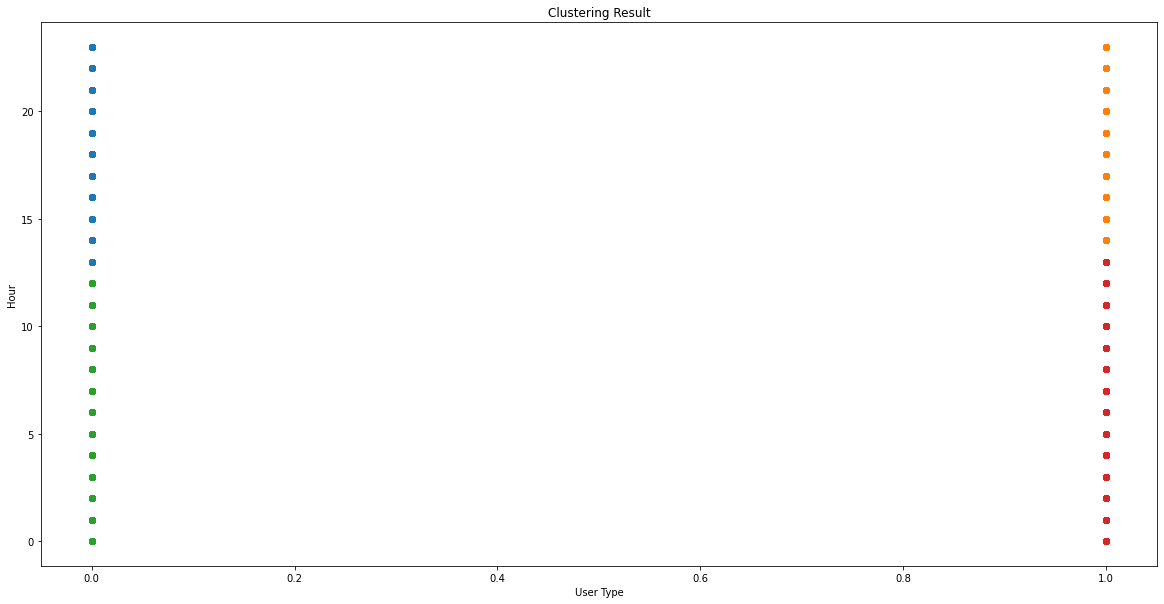

In [182]:
cluster_user_type(df_cluster_user_type, 4)

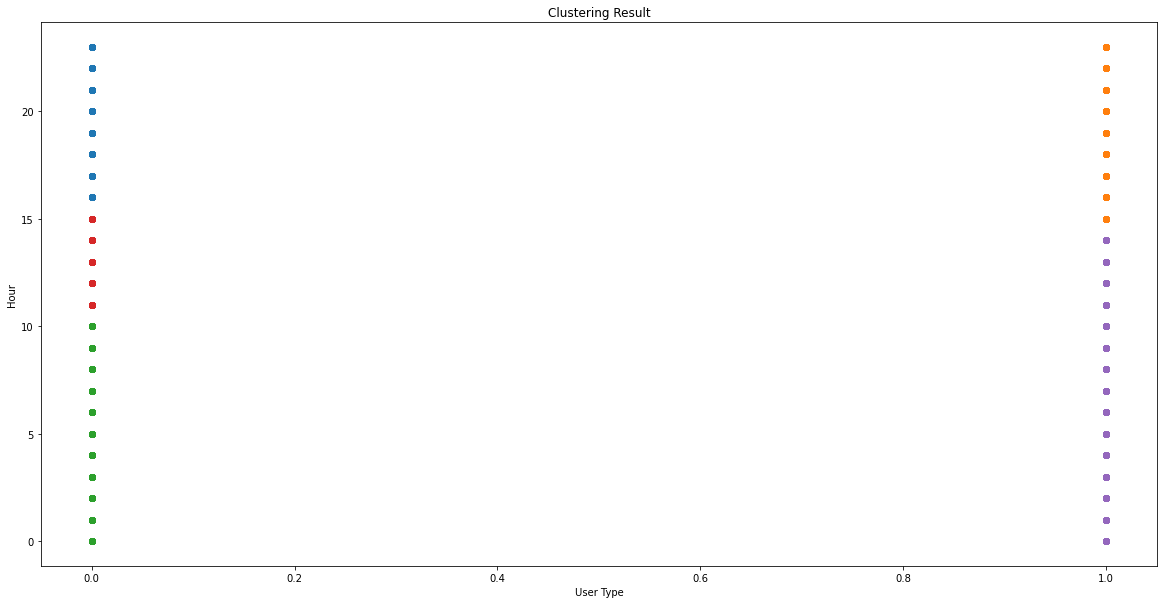

In [183]:
cluster_user_type(df_cluster_user_type, 5)

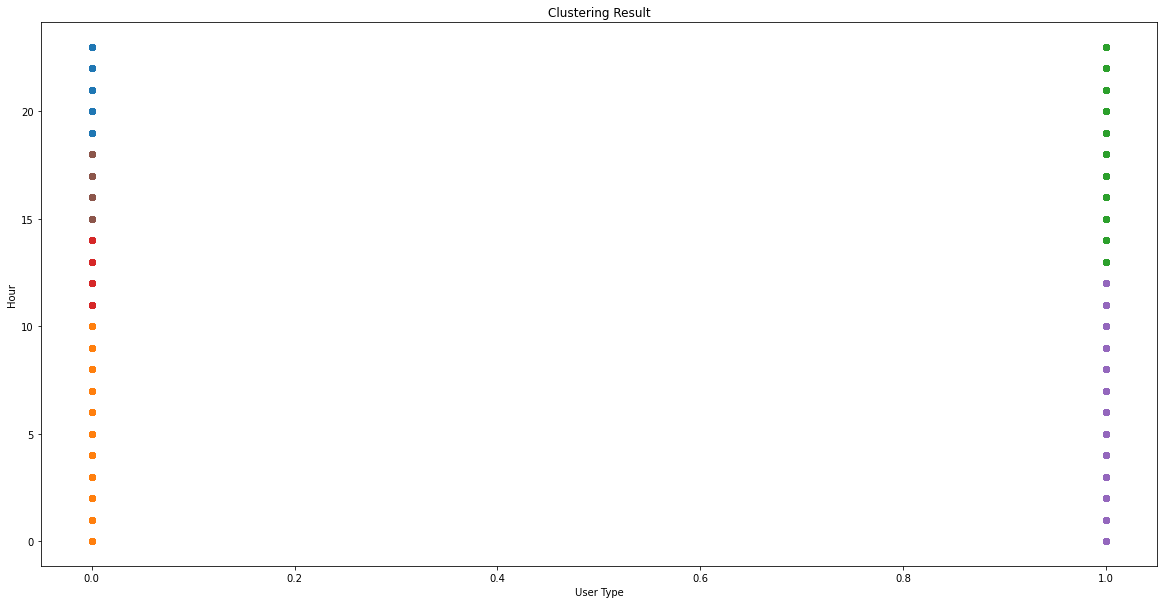

In [184]:
cluster_user_type(df_cluster_user_type, 6)

## Location Clustering

In this section, we use the above defined methods to cluster our data based on their location as well as their demand patterns.

In [185]:
df_station_occurrences.head(2)

occurrence  normalized_occurrence   Latitude  Longitude  \
1         461               0.004442  42.387151 -71.075978   
3       12614               0.122058  42.340115 -71.100619   

                     geometry  
1  POINT (-71.07598 42.38715)  
3  POINT (-71.10062 42.34012)

Since we have two columns that we don't need for our clustering we drop them.

In [186]:
df_location_clustering = df_station_occurrences.drop(['occurrence', 'geometry'], axis = 1)

In [187]:
df_location_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 378
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   normalized_occurrence  314 non-null    float64
 1   Latitude               314 non-null    float64
 2   Longitude              314 non-null    float64
dtypes: float64(3)
memory usage: 17.9 KB


At first, we use our above defined method to get a feeling about our loss. We see that we have several possible cluster assignments. For our interpretation, we choose 4 as k.

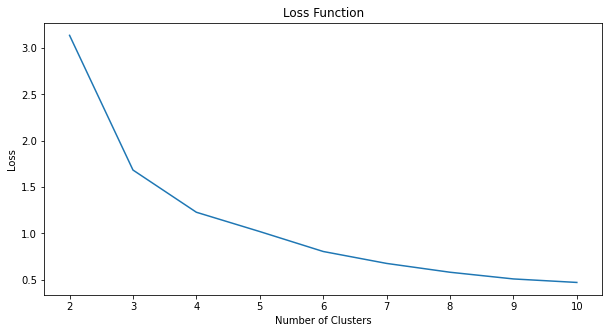

In [188]:
loss_function_without_scaling(df_location_clustering)

Now, we cluster our data and get one cluster map with ipyleaflet and one with matplotlib.

Map(center=[42.34884296596288, -71.08902092171014], controls=(ZoomControl(options=['position', 'zoom_in_text',…

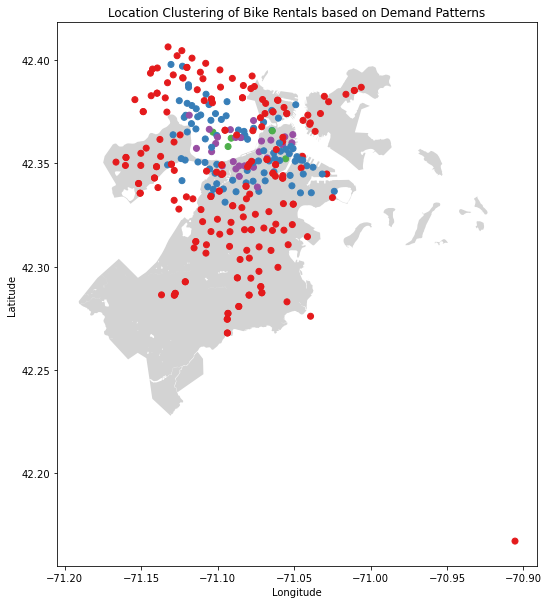

In [189]:
cluster_map_boston = location_clustering(df_location_clustering.copy(), 4)
cluster_map_boston

Here you can clearly see our four clusters:
1. (red): Stations not that popular, rather rural areas.
2. (blue): Stations not that far away from the city centre, more bike demand
3. (purple): Stations clearly in city area, high bike demand
4. (green): Stations directly at hot-spots, highest demand. Includes station at MIT, train stations etc.